In [ ]:
!pip install yfinance
!statsmodels.tsa.stattools
!sklearn.preprocessing

     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 11.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
/bin/bash: statsmodels.tsa.stattools: command not found
/bin/bash: sklearn.preprocessing: command not found


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
yf.pdr_override()
import math
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
plt.style.use('seaborn')
plt.style.use('ggplot')

In [ ]:
# input
symbol = 'GOOG'
start = '2019-01-01'
end = '2022-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Data
df.head()

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-02  1016.570007  1052.319946  1015.710022  1045.849976  1045.849976   
2019-01-03  1041.000000  1056.979980  1014.070007  1016.059998  1016.059998   
2019-01-04  1032.589966  1070.839966  1027.417969  1070.709961  1070.709961   
2019-01-07  1071.500000  1074.000000  1054.760010  1068.390015  1068.390015   
2019-01-08  1076.109985  1084.560059  1060.530029  1076.280029  1076.280029   

             Volume  
Date                 
2019-01-02  1532600  
2019-01-03  1841100  
2019-01-04  2093900  
2019-01-07  1981900  
2019-01-08  1764900

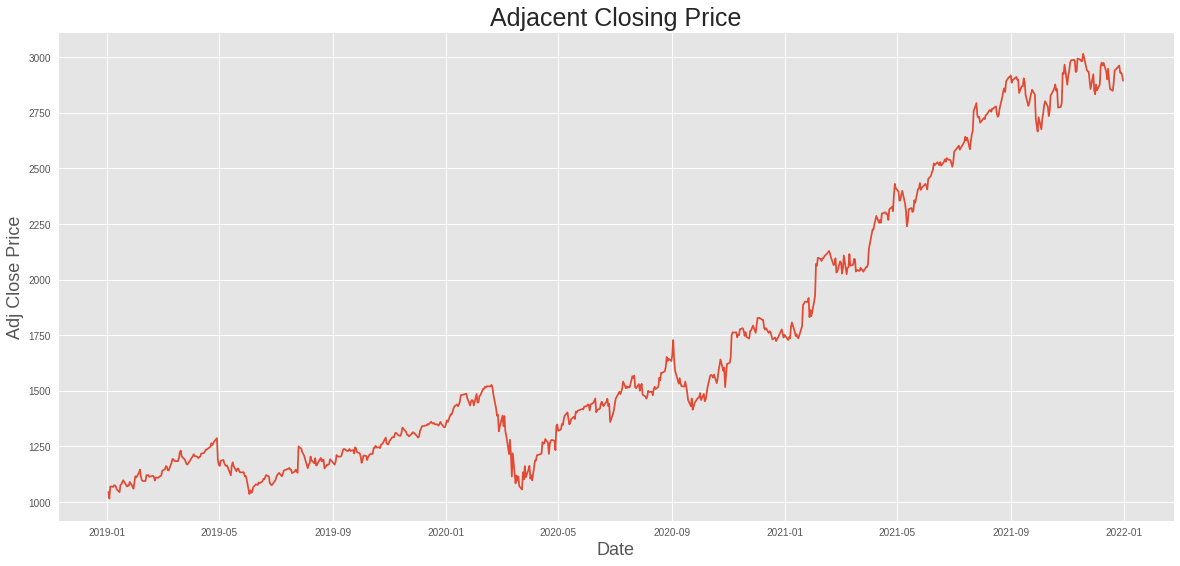

In [ ]:
#Visualize the adj closing price history
plt.figure(figsize = (20, 9))
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price', fontsize=18)
plt.title('Adjacent Closing Price', size=25)
plt.show()

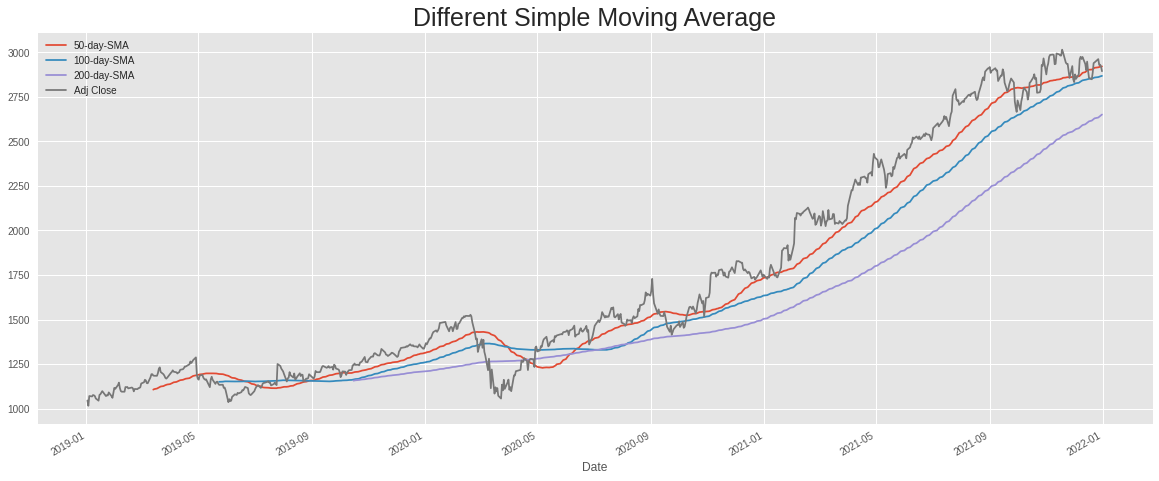

In [ ]:
#simple moving average
df.index = pd.to_datetime(df.index)
df['50-day-SMA'] = df['Adj Close'].rolling(window=50).mean()
df['100-day-SMA'] = df['Adj Close'].rolling(window=100).mean()
df['200-day-SMA'] = df['Adj Close'].rolling(window=200).mean()
df[['50-day-SMA','100-day-SMA','200-day-SMA','Adj Close']].plot(figsize = (20, 8))
plt.title('Different Simple Moving Average', size=25)
plt.show()

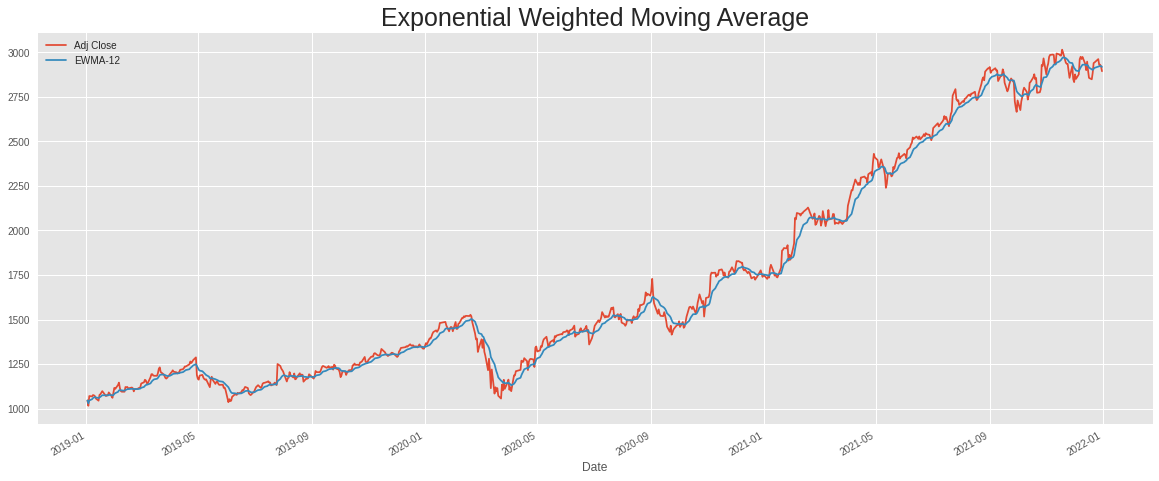

In [ ]:
# EWMA (exp.weighted moving average)
df['EWMA-12'] = df['Adj Close'].ewm(span=12).mean()
df[['Adj Close', 'EWMA-12']].plot(figsize = (20, 8))
plt.title('Exponential Weighted Moving Average', size=25)
plt.show()

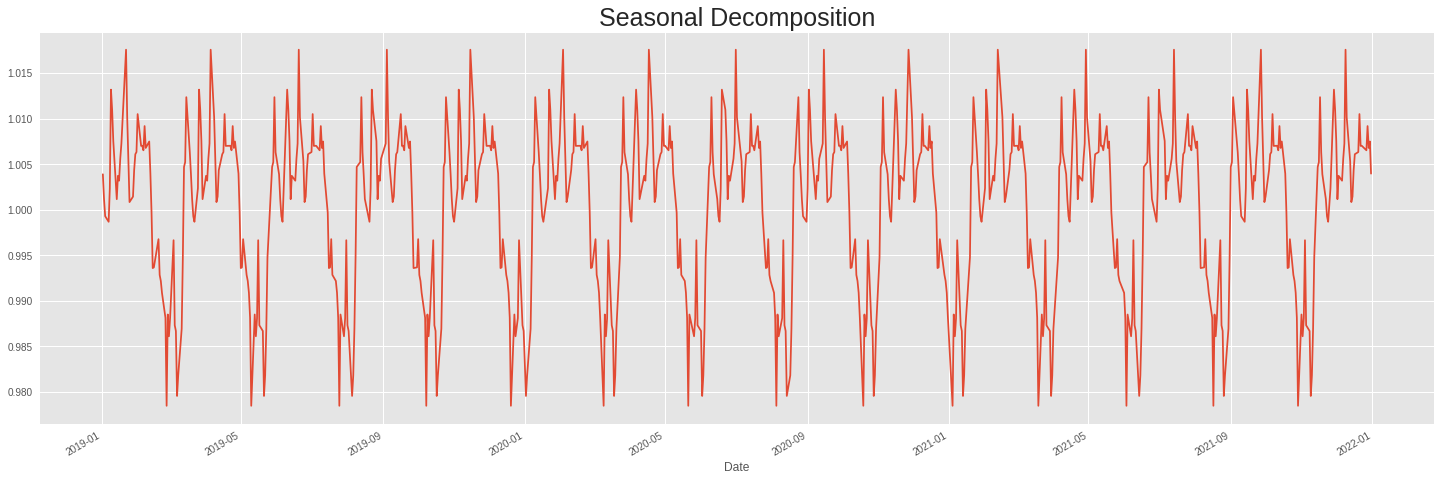

In [ ]:
# Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Adj Close'], model='multiplicative', freq=52)
result.seasonal.plot(figsize=(25,8))
plt.title('Seasonal Decomposition', size=25)
plt.show()

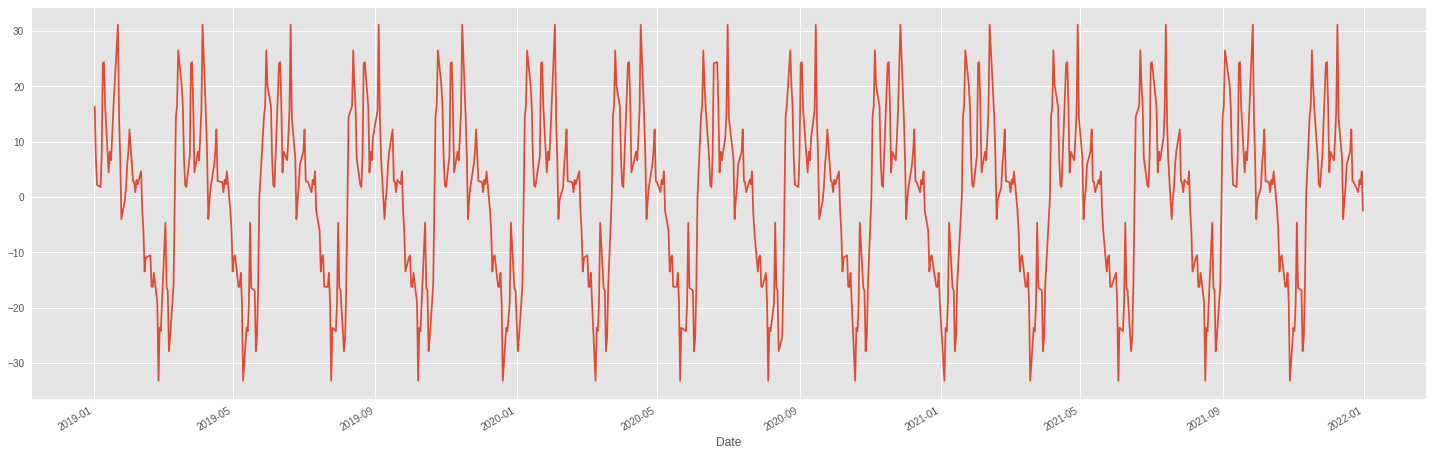

In [ ]:
result = seasonal_decompose(df['Adj Close'], model='additive', freq=52)
result.seasonal.plot(figsize=(25,8))
plt.show()

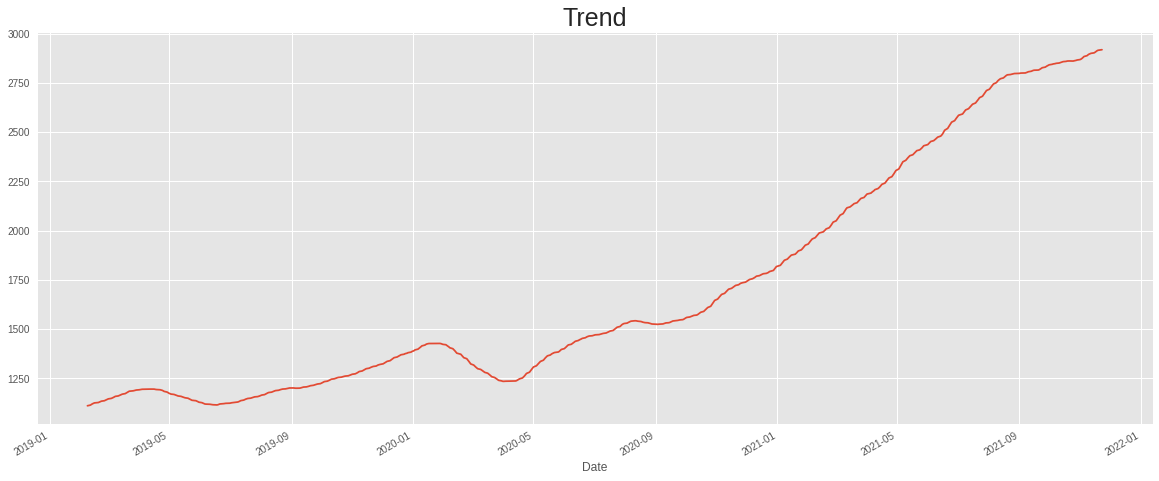

In [ ]:
result.trend.plot(figsize=(20,8))
plt.title('Trend', size=25)
plt.show()

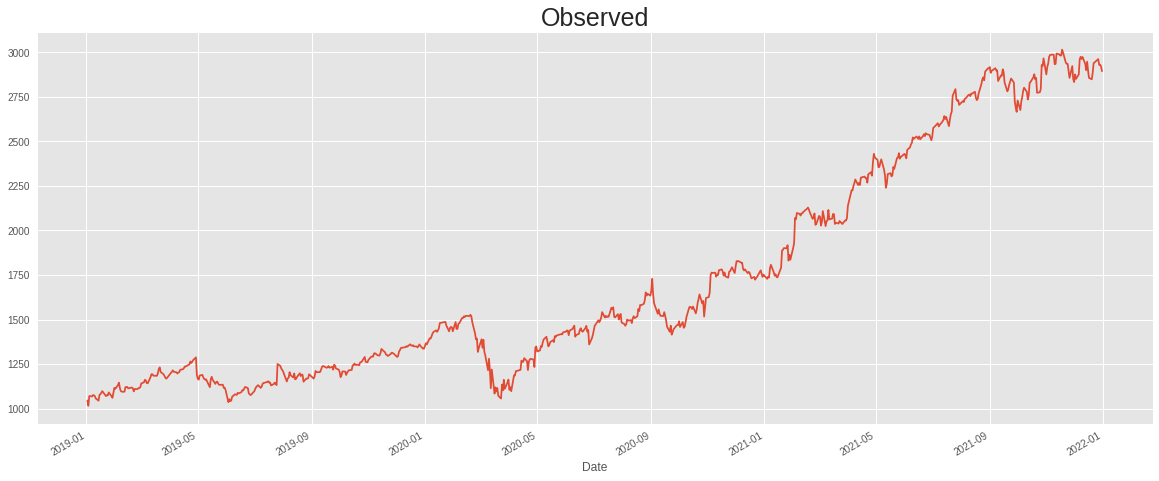

In [ ]:
result.observed.plot(figsize=(20,8))
plt.title('Observed', size=25)
plt.show()

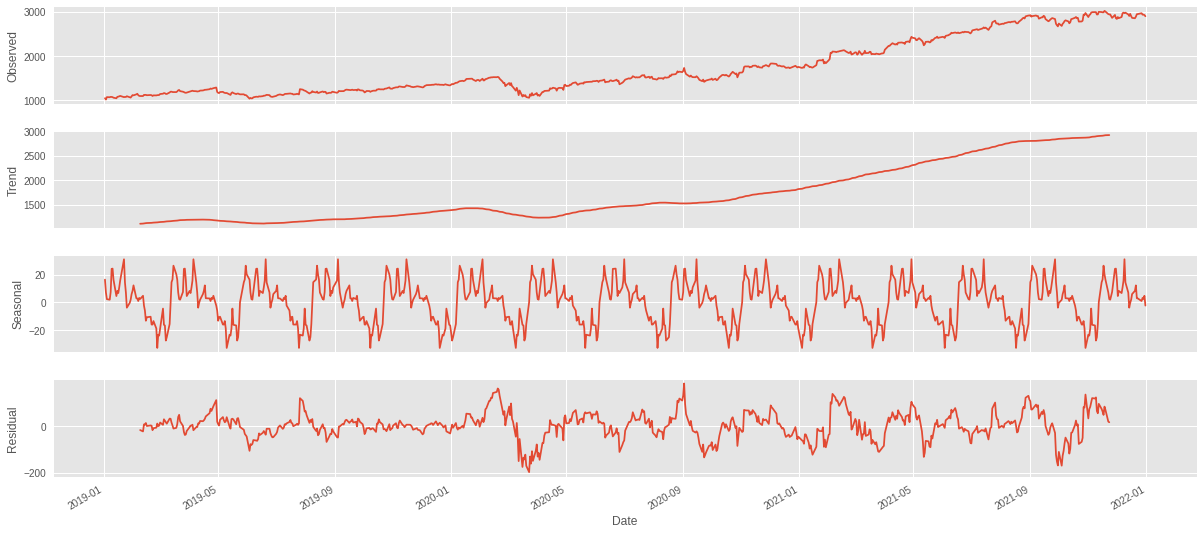

In [ ]:
fig = result.plot()
fig.set_size_inches(18,8)
plt.show()

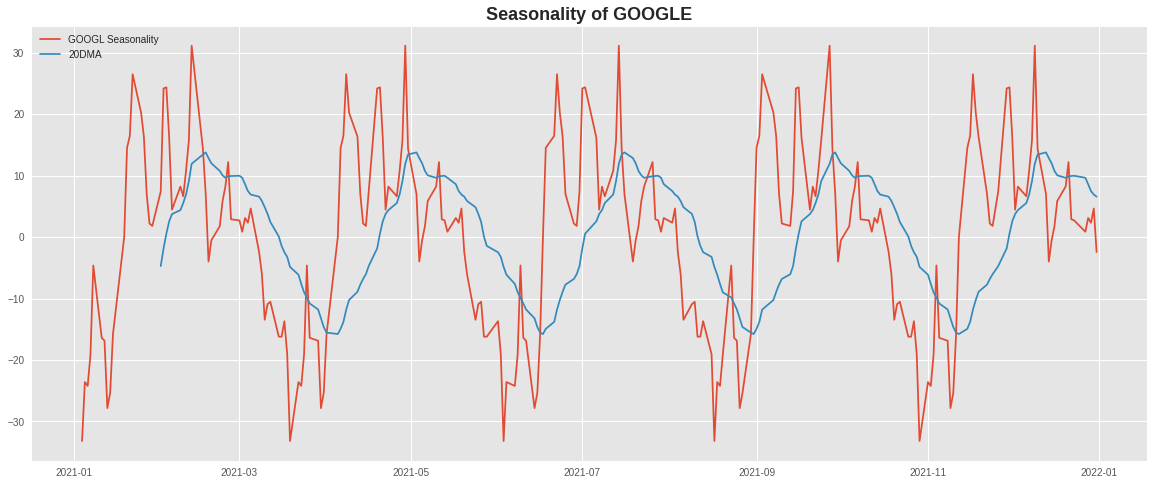

In [ ]:
#since time series are not stationary we isolate and inspect seasonality seperately 
y_Seasonality=result.seasonal[result.seasonal.index.year == 2021]
MA1=y_Seasonality.rolling(window=20).mean()
plt.figure(figsize = (20, 8))
plt.plot(y_Seasonality, label='GOOGL Seasonality')
plt.plot(MA1, label='20DMA')
plt.title("Seasonality of GOOGLE", fontsize=18, fontweight='bold')
plt.legend()

In [ ]:
df['12 Month Rolling Mean'] = df['Adj Close'].rolling(window=365).mean()
df['12 Month Rolling Std'] = df['Adj Close'].rolling(window = 365).std()

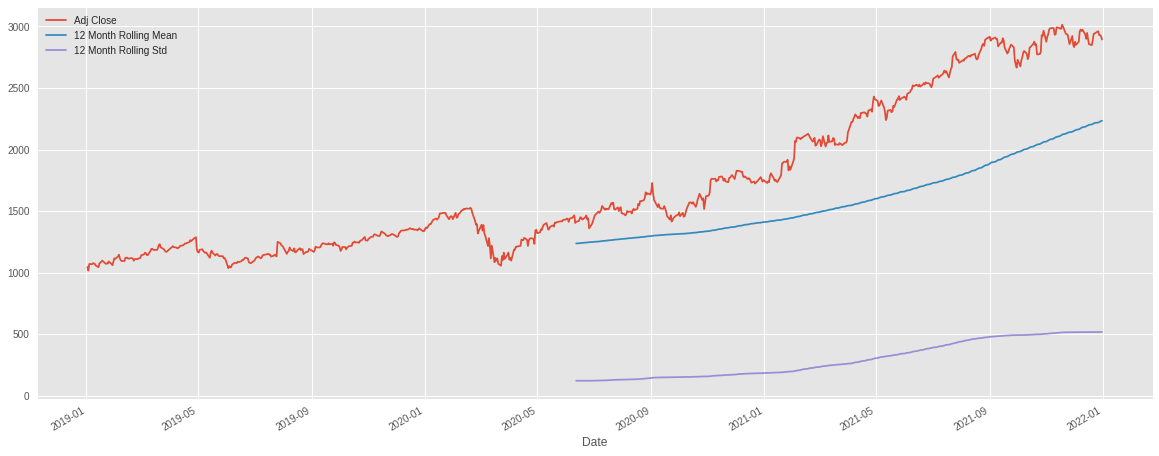

In [ ]:
# Time Series
df[['Adj Close','12 Month Rolling Mean','12 Month Rolling Std']].plot(figsize=(20,8))
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(df['Adj Close'])
#result1

In [ ]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic', 'p-value','# of lags','Num of Observations used']
    
    for value,label in zip(result,labels):
        print(label+ " : "+str(value))
        
    if result[1] <= 0.05:
        print("Null hypothesis is rejected, data has no unit root and is stationary")
        
    else:
        print("We do not reject the null hypothesis, data has a unit root and it is non-stationary")

In [ ]:
adf_check(df['Adj Close'])

Augmented Dicky-Fuller Test
ADF Test Statistic : 0.3686829159942244
p-value : 0.9802852546502486
# of lags : 16
Num of Observations used : 740
We do not reject the null hypothesis, data has a unit root and it is non-stationary


In [ ]:
df['First Difference'] = df['Adj Close'] - df['Adj Close'].shift(1)

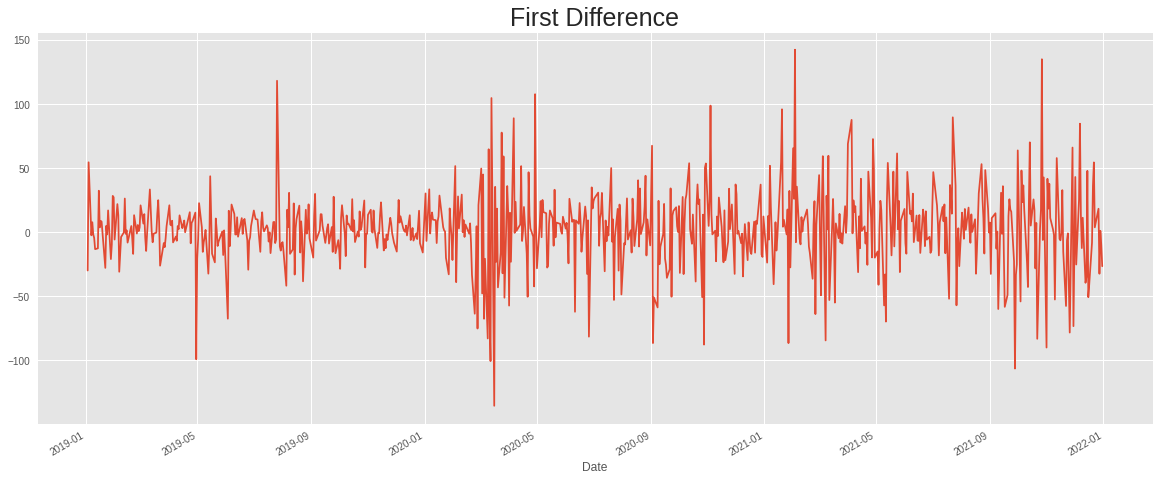

In [ ]:
df['First Difference'].plot(figsize=(20,8))
plt.title('First Difference', size=25)
plt.show()

In [ ]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -6.184767546721702
p-value : 6.328432284291809e-08
# of lags : 15
Num of Observations used : 740
Null hypothesis is rejected, data has no unit root and is stationary


In [ ]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

In [ ]:
adf_check(df['Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -11.811113743892207
p-value : 8.856162632751929e-22
# of lags : 16
Num of Observations used : 738
Null hypothesis is rejected, data has no unit root and is stationary


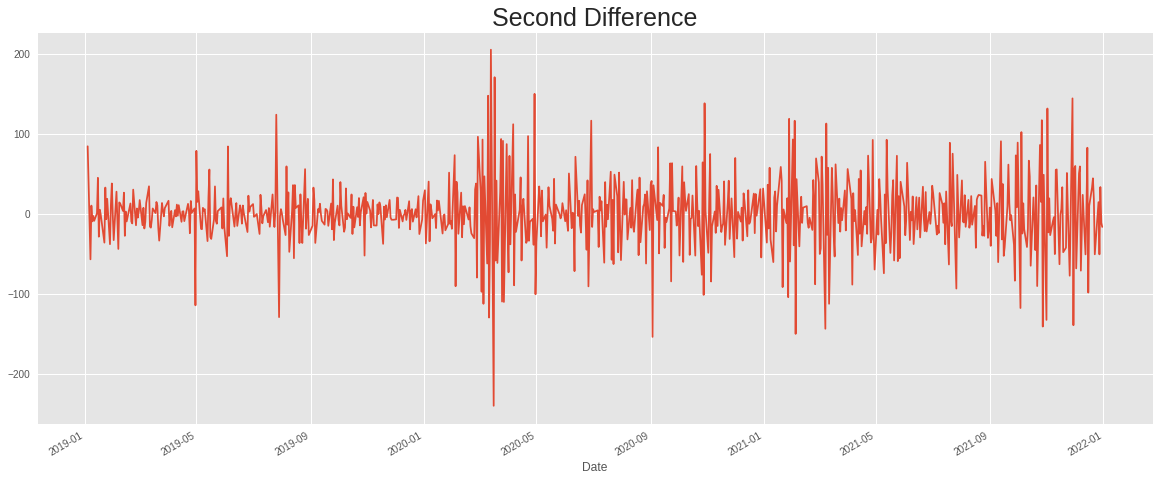

In [ ]:
df['Second Difference'].plot(figsize=(20,8))
plt.title('Second Difference', size=25)
plt.show()

In [ ]:
df['Seasonal Difference'] = df['Adj Close'] - df['Adj Close'].shift(12)


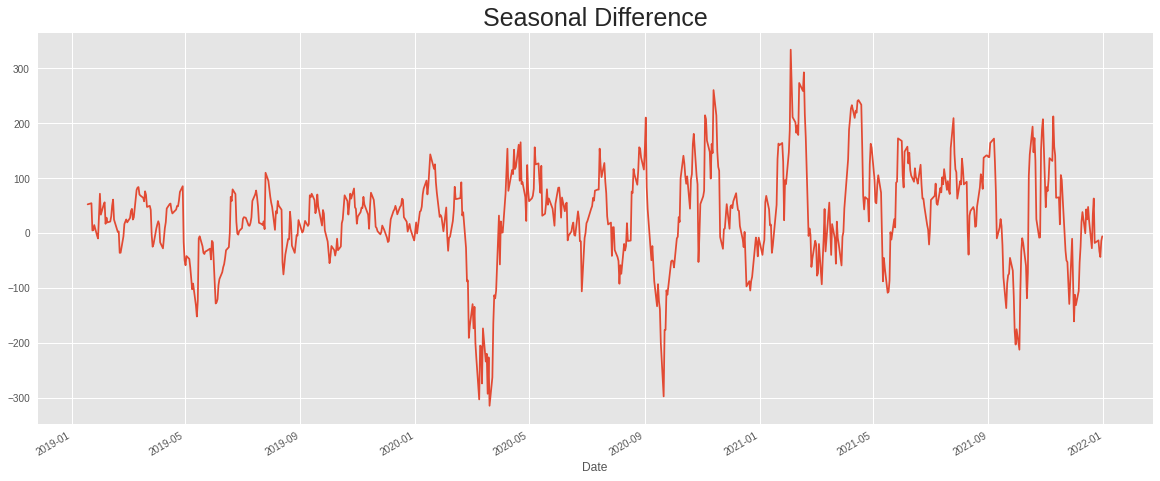

In [ ]:
df['Seasonal Difference'].plot(figsize=(20,8))
plt.title('Seasonal Difference', size=25)
plt.show()

In [ ]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -6.090674512244961
p-value : 1.0383299418933017e-07
# of lags : 19
Num of Observations used : 725
Null hypothesis is rejected, data has no unit root and is stationary


In [ ]:
df['First Seasonal Difference'] = df['First Difference'] - df['First Difference'].shift(12)


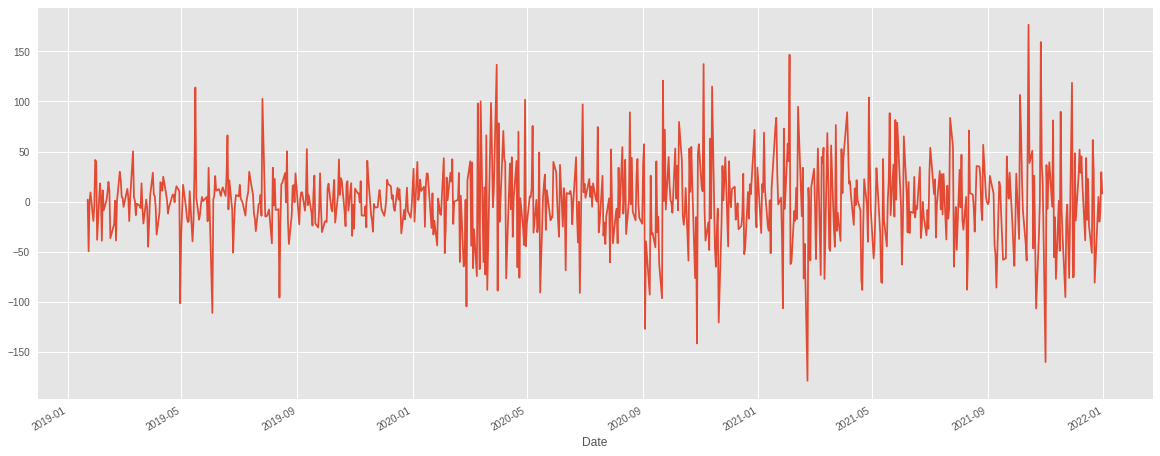

In [ ]:
df['First Seasonal Difference'].plot(figsize=(20,8))
plt.show()

In [ ]:
adf_check(df['First Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -8.509695694277491
p-value : 1.176573641678236e-13
# of lags : 16
Num of Observations used : 727
Null hypothesis is rejected, data has no unit root and is stationary


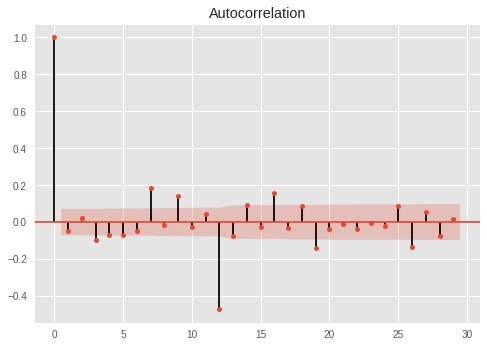

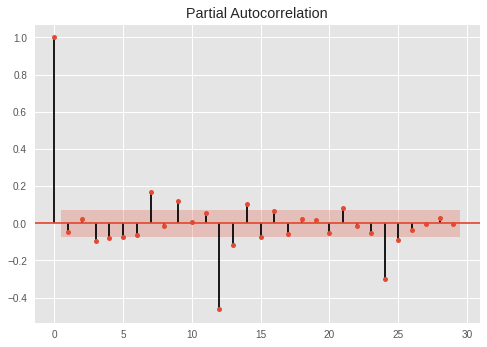

In [ ]:
plot_acf(df['First Seasonal Difference'].dropna())
plot_pacf(df['First Seasonal Difference'].dropna())
plt.show()

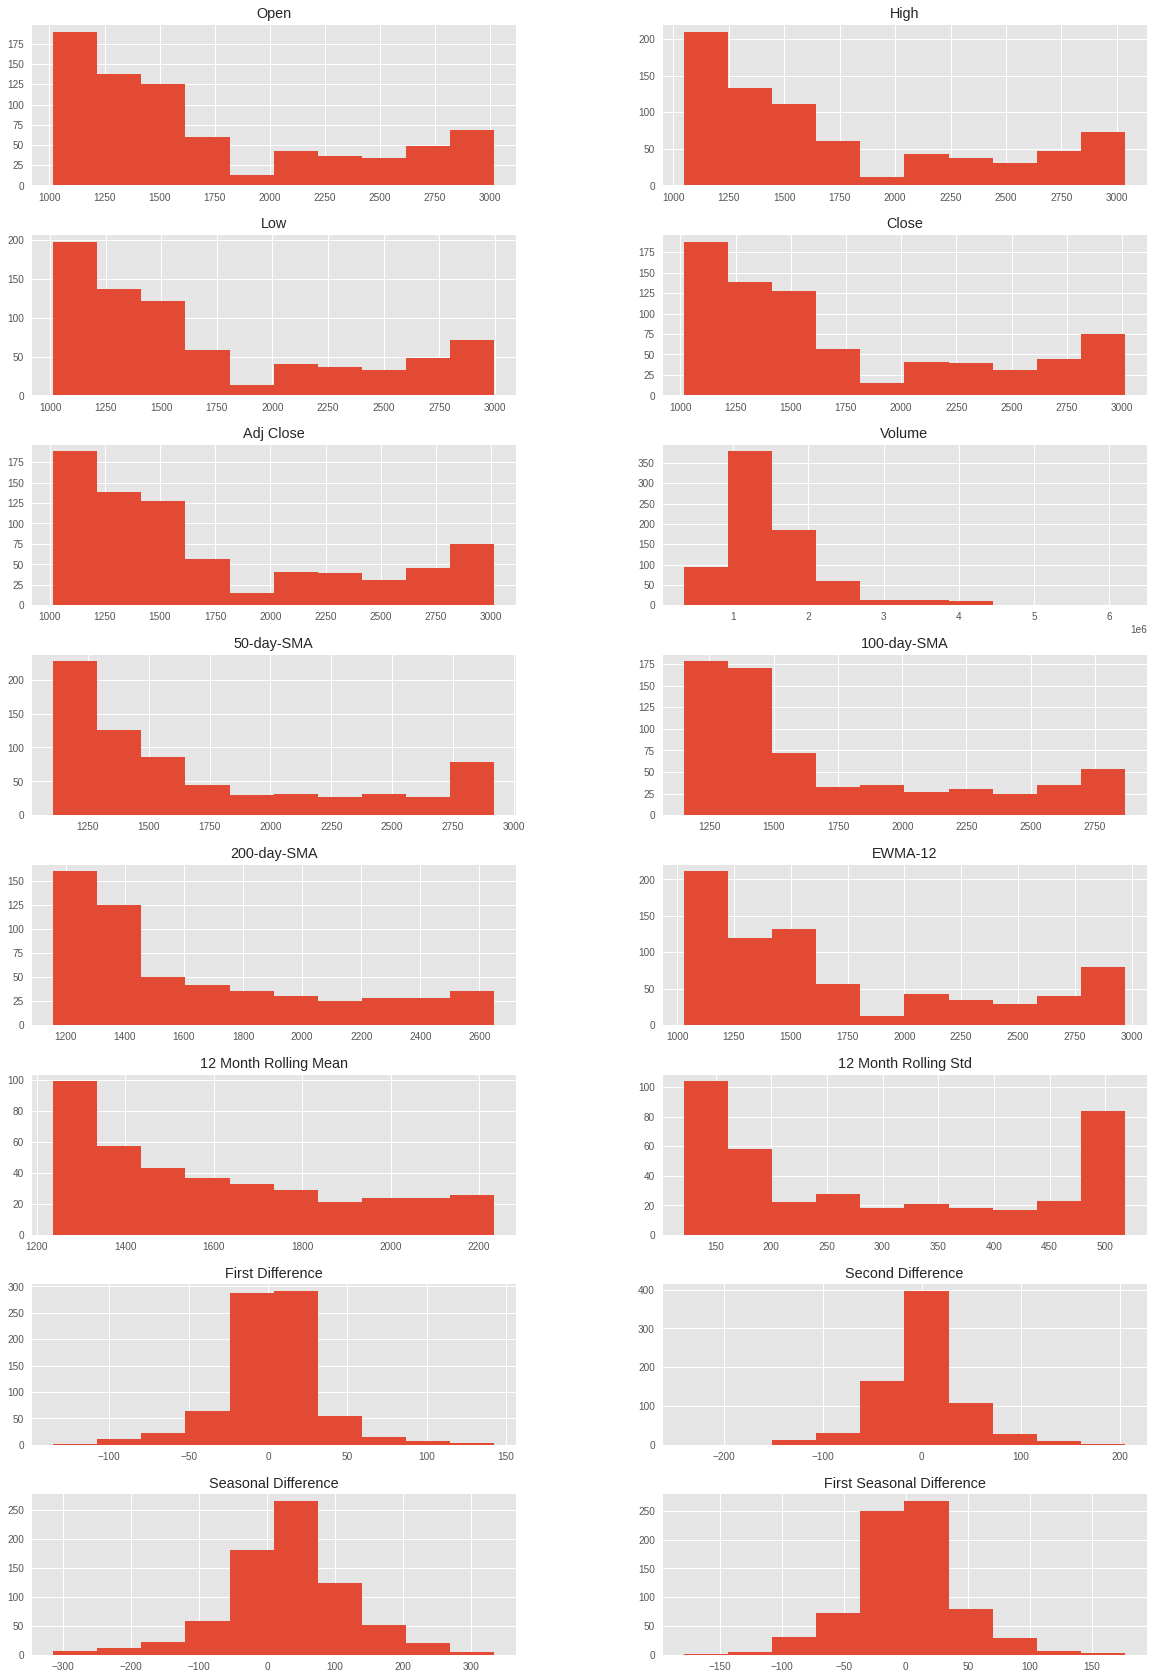

In [ ]:
columns_multi = [x for x in list(df.columns)]
columns_multi
plt.rcParams['figure.figsize'] = (20,30)
names = columns_multi
df.hist(layout = (8,2), column = columns_multi)
plt.show()

RISK ANALYSIS

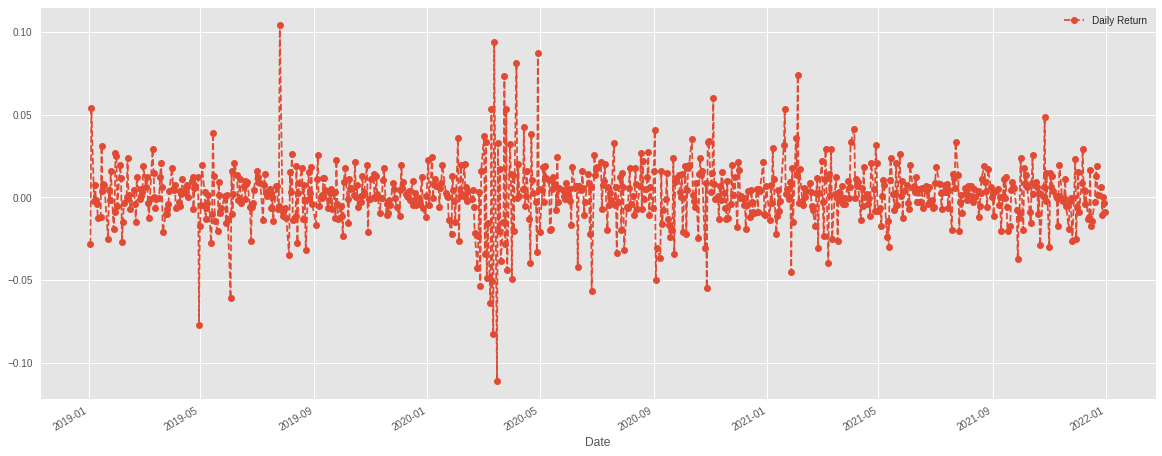

In [ ]:
# We'll use pct_change to find the percent change for each day
df['Daily Return'] = df['Close'].pct_change()

# Lets plot the daily return percentage
df['Daily Return'].plot(figsize=(20,8), legend=True, linestyle='--', marker='o')

In [ ]:
df_return = df['Daily Return'].dropna()
df_return.head()

Date
2019-01-03   -0.028484
2019-01-04    0.053786
2019-01-07   -0.002167
2019-01-08    0.007385
2019-01-09   -0.001505
Name: Daily Return, dtype: float64

Value at risk (the amount of money we could expect to lose (aka putting at risk) for a given confidence interval)

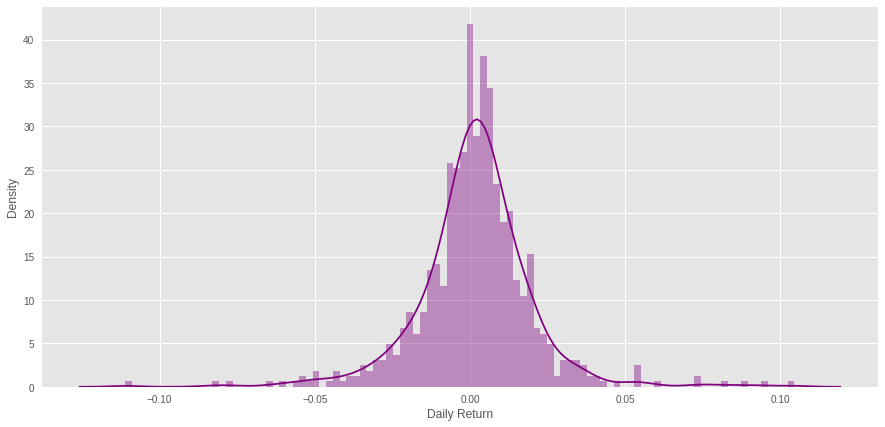

In [ ]:
plt.figure(figsize=[15,7])
sns.distplot(df_return.dropna(),bins=100,color='purple')

In [ ]:
# The 0.05 empirical quantile of daily returns

df_return.quantile(0.05)

-0.027017568209305398

The 0.05 empirical quantile of daily returns is at -0.027. That means that with 95% confidence, our worst daily loss will not exceed 2.7%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.027 * 1,000,000 = 27,000.

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is. 
We will use the Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

In [ ]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = df_return.mean()

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = df_return.std()

In [ ]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [ ]:
df.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-02  1016.570007  1052.319946  1015.710022  1045.849976  1045.849976   
2019-01-03  1041.000000  1056.979980  1014.070007  1016.059998  1016.059998   
2019-01-04  1032.589966  1070.839966  1027.417969  1070.709961  1070.709961   
2019-01-07  1071.500000  1074.000000  1054.760010  1068.390015  1068.390015   
2019-01-08  1076.109985  1084.560059  1060.530029  1076.280029  1076.280029   

             Volume  50-day-SMA  100-day-SMA  200-day-SMA      EWMA-12  \
Date                                                                     
2019-01-02  1532600         NaN          NaN          NaN  1045.849976   
2019-01-03  1841100         NaN          NaN          NaN  1029.713737   
2019-01-04  2093900         NaN          NaN          NaN  1045.714573   
2019-01-07  1981900         NaN          NaN          NaN  1052.872324   
2019-01-08  1764900         NaN          NaN          NaN  1059.232114   

            12 Month Rolling Mean  12 Month Rolling Std  First Difference  \
Date                                                                        
2019-01-02                    NaN                   NaN               NaN   
2019-01-03                    NaN                   NaN        -29.789978   
2019-01-04                    NaN                   NaN         54.649963   
2019-01-07                    NaN                   NaN         -2.319946   
2019-01-08                    NaN                   NaN          7.890015   

            Second Difference  Seasonal Difference  First Seasonal Difference  \
Date                                                                            
2019-01-02                NaN                  NaN                        NaN   
2019-01-03                NaN                  NaN                        NaN   
2019-01-04          84.439941                  NaN                        NaN   
2019-01-07         -56.969910                  NaN                        NaN   
2019-01-08          10.209961                  NaN                        NaN   

            Daily Return  
Date                      
2019-01-02           NaN  
2019-01-03     -0.028484  
2019-01-04      0.053786  
2019-01-07     -0.002167  
2019-01-08      0.007385

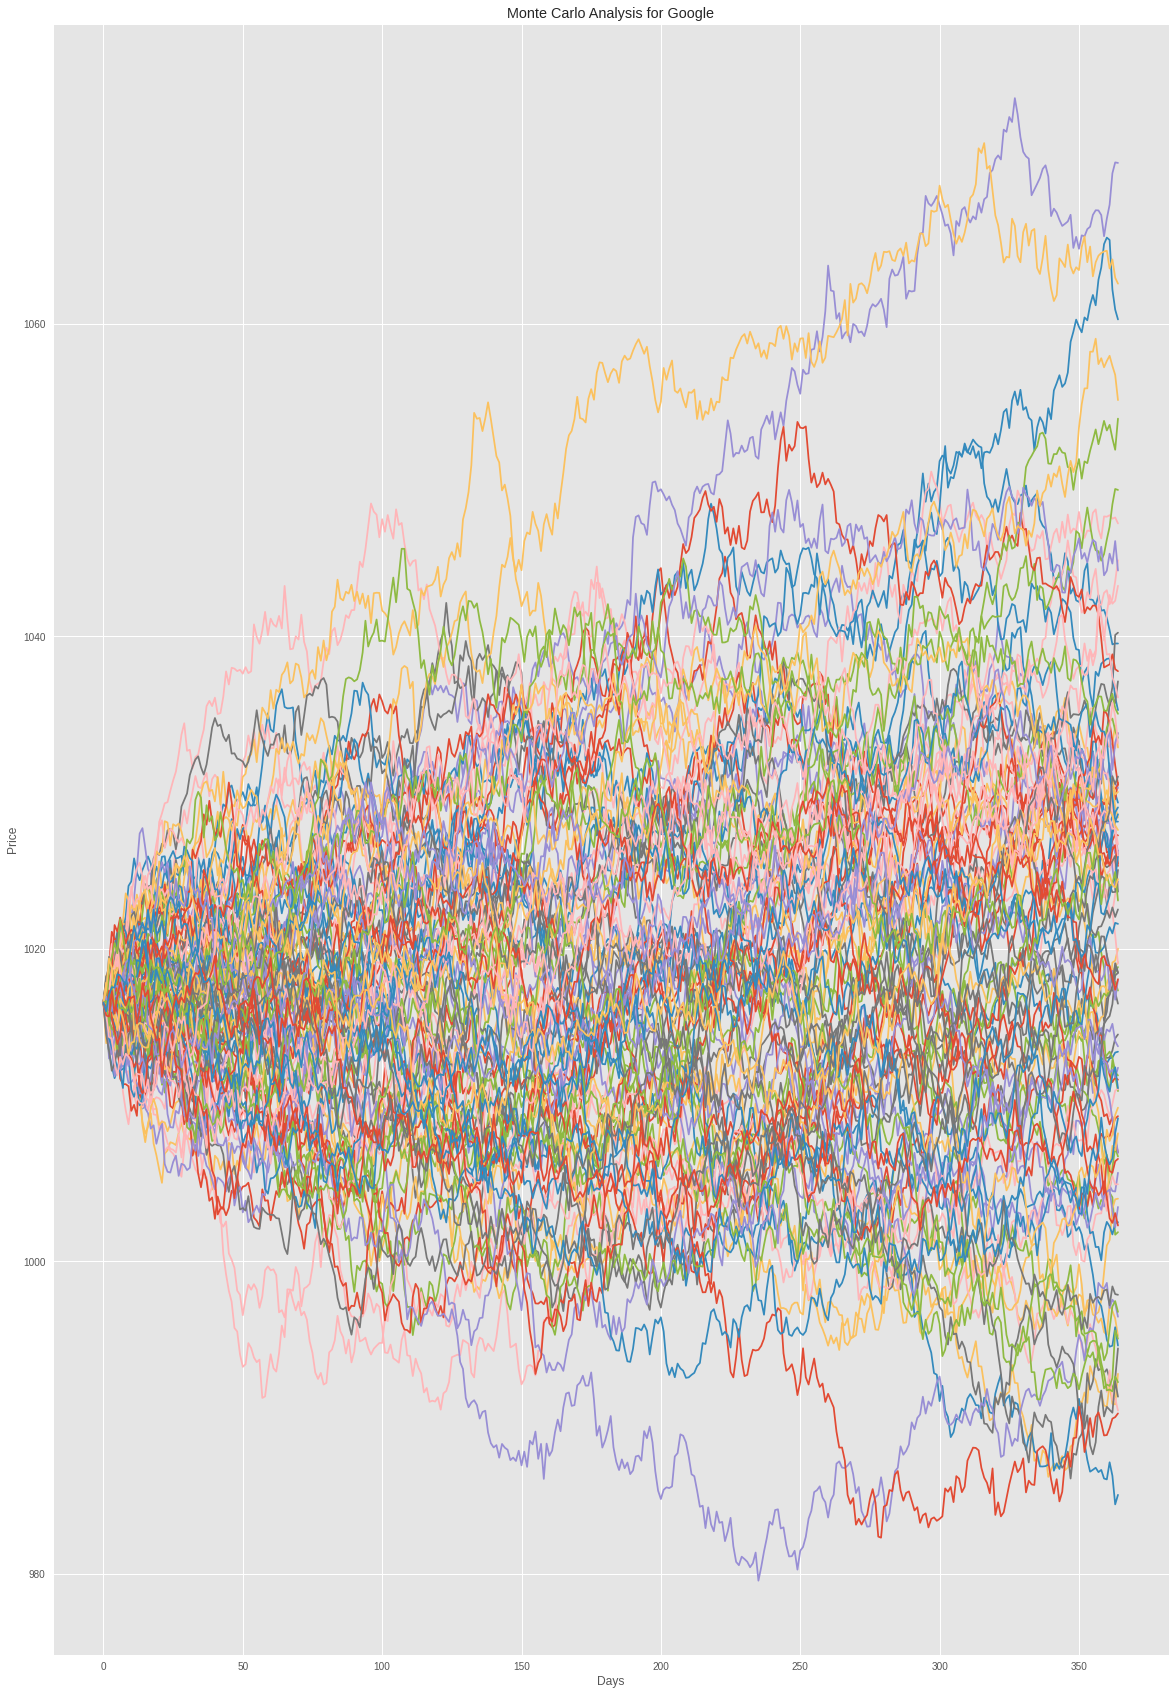

In [ ]:
start_price = 1016.57
for run in range(100):
  plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')
plt.plot(figsize=(20,20))
plt.show()

In [ ]:
start_price = 1016.57

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

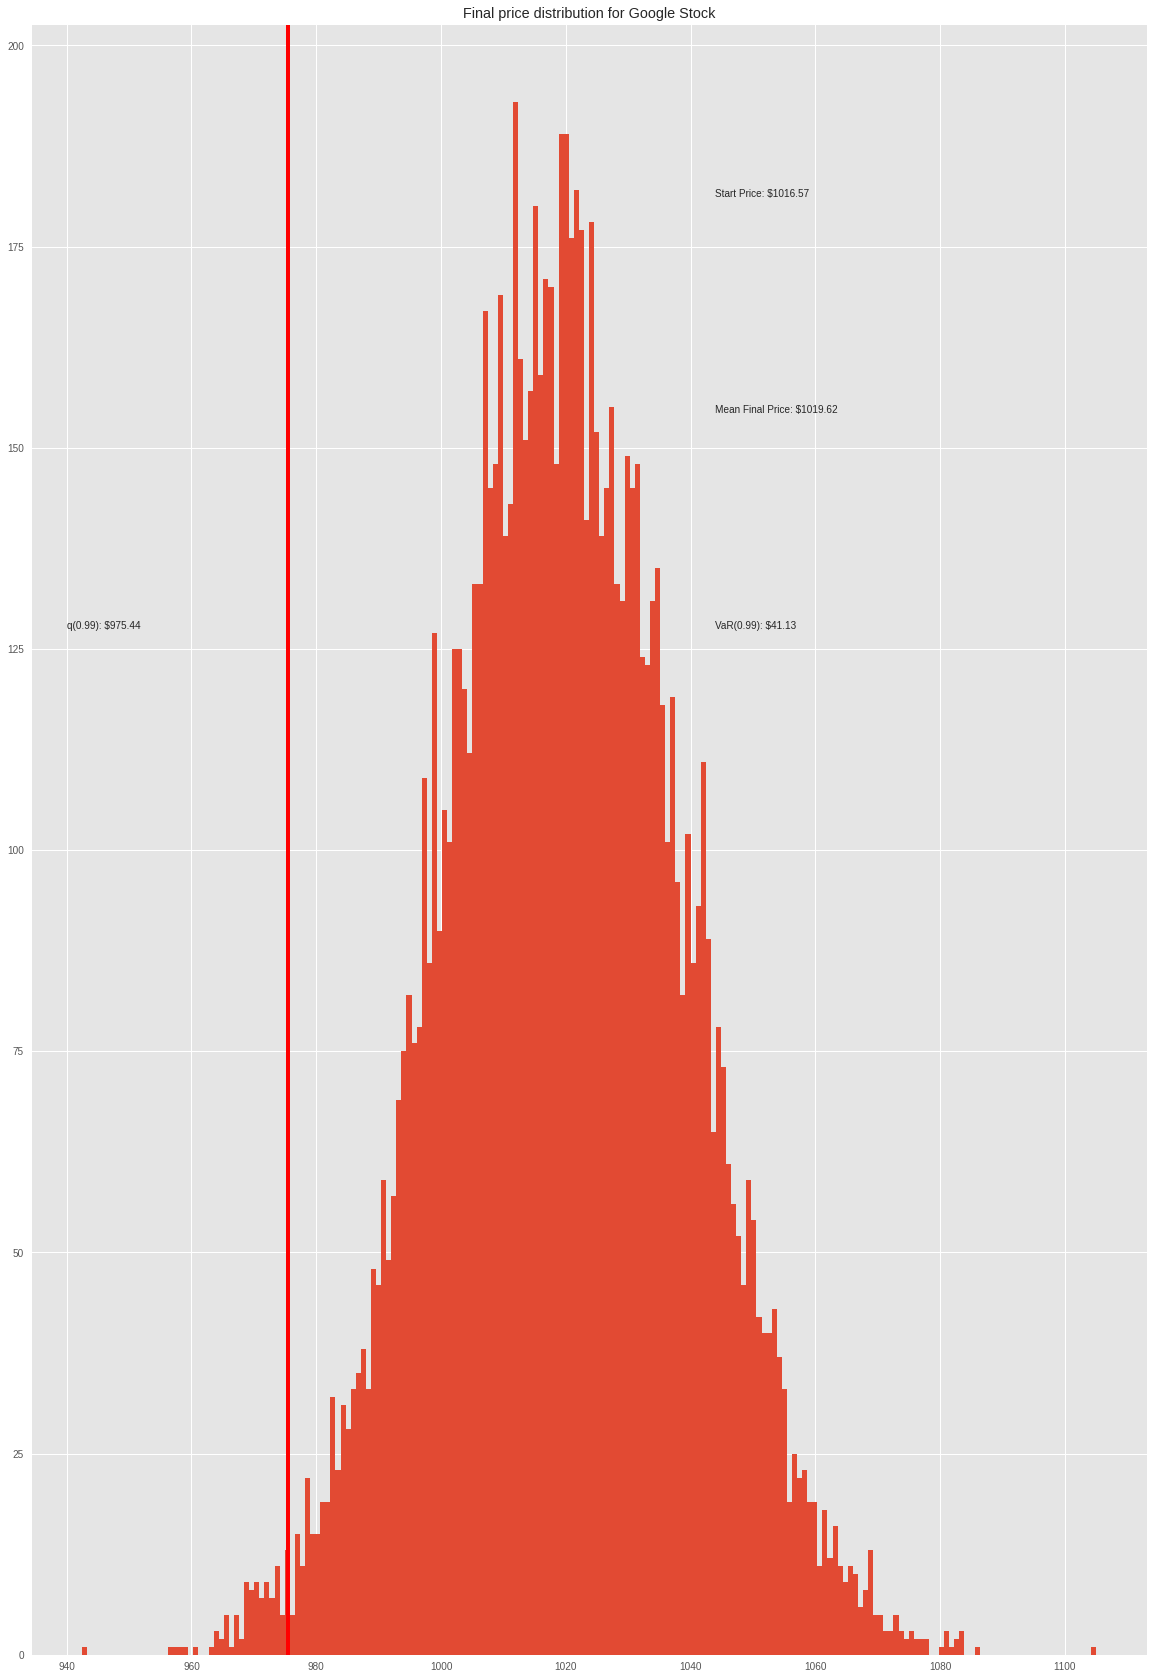

In [ ]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Google Stock")
plt.plot(figsize=(20,15))
plt.show()

the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google Stock(GOOGL), which looks to be $39.92 for every investment of 1016.57 (The price of one initial Google Stock).

This basically means for every initial GOOGL stock you purchase you're putting about $39.92 at risk 99% of the time from our Monte Carlo Simulation.

#**END OF ANALYSIS** 

---



#**RANDOM FOREST**

In [ ]:
# For Data Processing
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For data source
!pip install yfinance
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

Predict Stock price of GOOGL

[*********************100%***********************]  1 of 1 completed


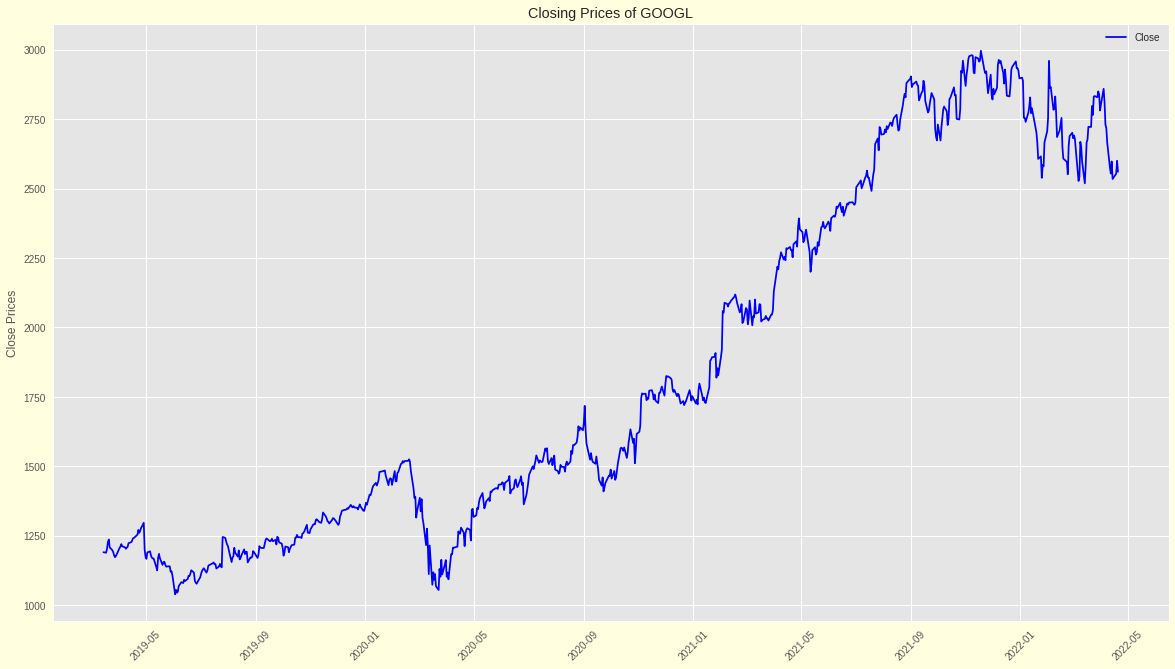

In [ ]:
# Download closing prices of GOOGL
data_GOOGL = yf.download("GOOGL", start="2019-03-15", end="2022-04-21")[['Close','Volume','High','Low']].fillna(method='bfill')
fig = plt.figure(figsize = (20, 11), facecolor='lightyellow')
plt.plot(data_GOOGL['Close'], color = 'blue', label = 'Close')
plt.xticks(rotation=45)
plt.ylabel("Close Prices")
plt.title('Closing Prices of GOOGL')
plt.legend()
plt.show()

In [ ]:
data_GOOGL['3day MA'] = data_GOOGL['Close'].shift(1).rolling(window=3).mean()
data_GOOGL['10day MA'] = data_GOOGL['Close'].shift(1).rolling(window=10).mean()
data_GOOGL['30day MA'] = data_GOOGL['Close'].shift(1).rolling(window=30).mean()
data_GOOGL['Std_dev'] = data_GOOGL['Close'].rolling(5).std()
data_GOOGL['Daily Return in percentage'] = data_GOOGL['Close'].pct_change(1).fillna(0)
data_GOOGL = data_GOOGL[30:]

Feature Selection

In [ ]:
x = data_GOOGL.iloc[:, 1:]
y = data_GOOGL.iloc[:, 0]

train_size = int(0.70 * y.shape[0])
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model_GOOGL = RandomForestRegressor()

grid_rf = {
'n_estimators': [20, 50, 100],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [42]
}
rscv_GOOGL = RandomizedSearchCV(estimator=model_GOOGL, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit_GOOGL = rscv_GOOGL.fit(x_train, y_train)
best_parameters_GOOGL = rscv_fit_GOOGL.best_params_
print(best_parameters_GOOGL)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 42, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 9, 'bootstrap': False}


In [ ]:
model_GOOGL = RandomForestRegressor(random_state=42, n_estimators=50,  min_samples_split=2, min_samples_leaf=3, max_depth=12, bootstrap=False)
model_GOOGL.fit(x_train, y_train)
predict_GOOGL = model_GOOGL.predict(x_test)
#print(predict_GOOGL)
#print(predict_GOOGL.shape)

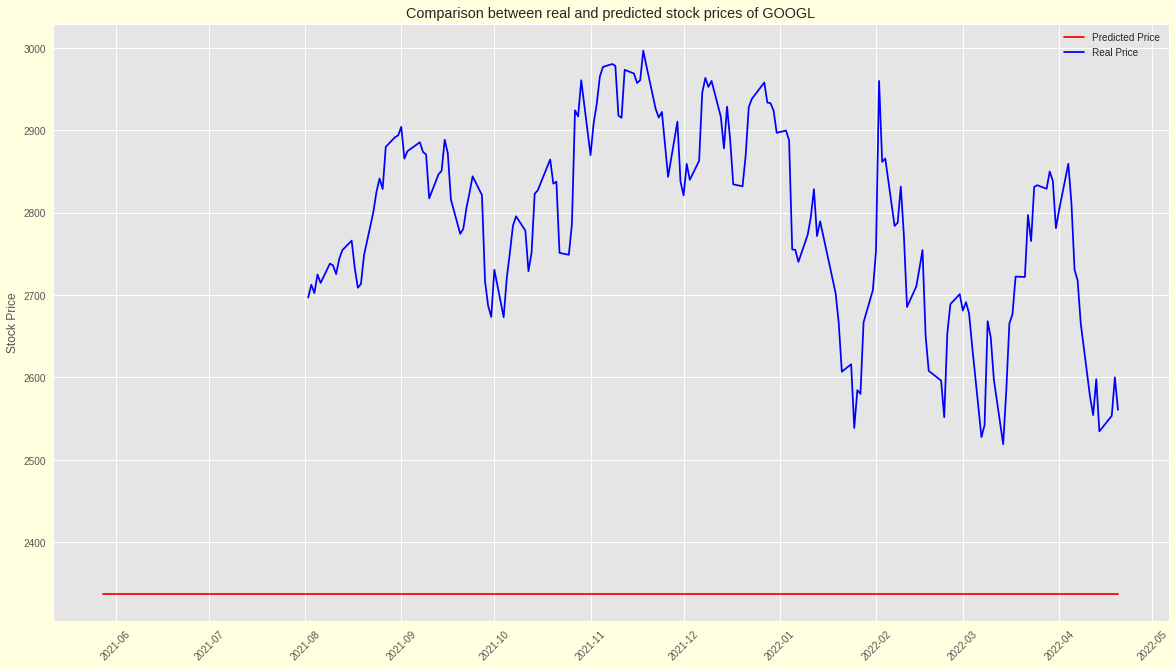

In [ ]:
y_pred_series = pd.Series(predict_GOOGL, index=y_test.index)
fig = plt.figure(figsize = (20, 11), facecolor='lightyellow')
plt.plot(y_pred_series, color = 'red', label = 'Predicted Price')
plt.plot(data_GOOGL['Close'][570:], color = 'blue', label = 'Real Price')
plt.ylabel("Stock Price")
plt.xticks(rotation=45)
plt.title('Comparison between real and predicted stock prices of GOOGL')
plt.legend()
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_GOOGL))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_GOOGL))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_GOOGL)))

Mean Absolute Error: 393.9004819076673
Mean Squared Error: 181753.47811566165
Root Mean Squared Error: 426.3255541433819


In [ ]:
errors = abs(predict_GOOGL - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy: 85.89 %.


In [ ]:
# Confusion matrix:

import pandas as pd
from sklearn import metrics

y_actual = pd.Series(y_test, name='Actual')
y_predicted = pd.Series(predict_GOOGL, name='Predicted')

#create confusion matrix
print(pd.crosstab(y_test, predict_GOOGL))

col_0        2336.782532
Close                   
2347.580078            1
2356.850098            1
2370.590088            1
2381.179932            1
2393.570068            1
...                  ...
2977.040039            1
2978.370117            1
2978.530029            1
2980.620117            1
2996.770020            1

[226 rows x 1 columns]


Predict Stock Price of MSFT

[*********************100%***********************]  1 of 1 completed


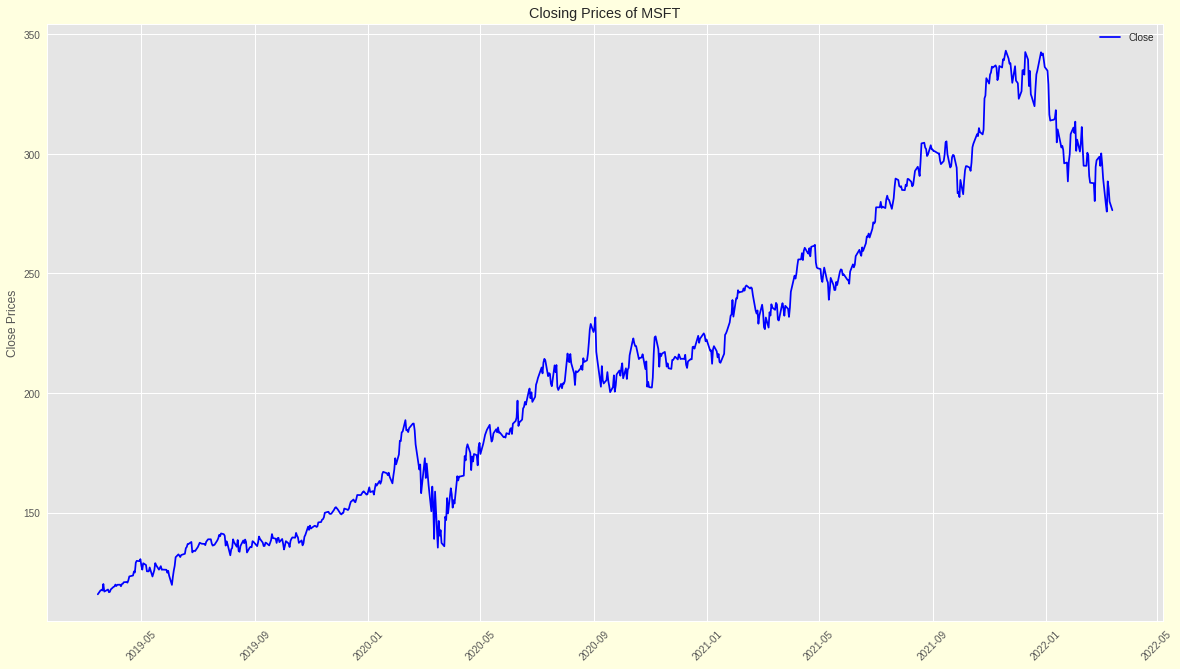

In [ ]:
# Download closing prices of MSFT
data_MSFT = yf.download("MSFT", start="2019-03-15", end="2022-03-15")[['Close','Volume','High','Low']].fillna(method='bfill')
fig = plt.figure(figsize = (20, 11), facecolor='lightyellow')
plt.plot(data_MSFT['Close'], color = 'blue', label = 'Close')
plt.xticks(rotation=45)
plt.ylabel("Close Prices")
plt.title('Closing Prices of MSFT')
plt.legend()
plt.show()

In [ ]:
data_MSFT['3day MA'] = data_MSFT['Close'].shift(1).rolling(window=3).mean()
data_MSFT['10day MA'] = data_MSFT['Close'].shift(1).rolling(window=10).mean()
data_MSFT['30day MA'] = data_MSFT['Close'].shift(1).rolling(window=30).mean()
data_MSFT['Std_dev'] = data_MSFT['Close'].rolling(5).std()
data_MSFT['Daily Return in percentage'] = data_MSFT['Close'].pct_change(1).fillna(0)
data_MSFT = data_MSFT[30:]

Feature Selection

In [ ]:
x = data_MSFT.iloc[:, 1:]
y = data_MSFT.iloc[:, 0]

train_size = int(0.70 * y.shape[0])
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model_MSFT = RandomForestRegressor()

grid_rf = {
'n_estimators': [20, 50, 100],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [43]
}
rscv_MSFT = RandomizedSearchCV(estimator=model_MSFT, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit_MSFT = rscv_MSFT.fit(x_train, y_train)
best_parameters_MSFT = rscv_fit_MSFT.best_params_
print(best_parameters_MSFT)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 43, 'n_estimators': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_depth': 9, 'bootstrap': False}


In [ ]:
model_MSFT = RandomForestRegressor(random_state=43, n_estimators=50,  min_samples_split=2, min_samples_leaf=1, max_depth=13, bootstrap=True)
model_MSFT.fit(x_train, y_train)
predict_MSFT = model_MSFT.predict(x_test)

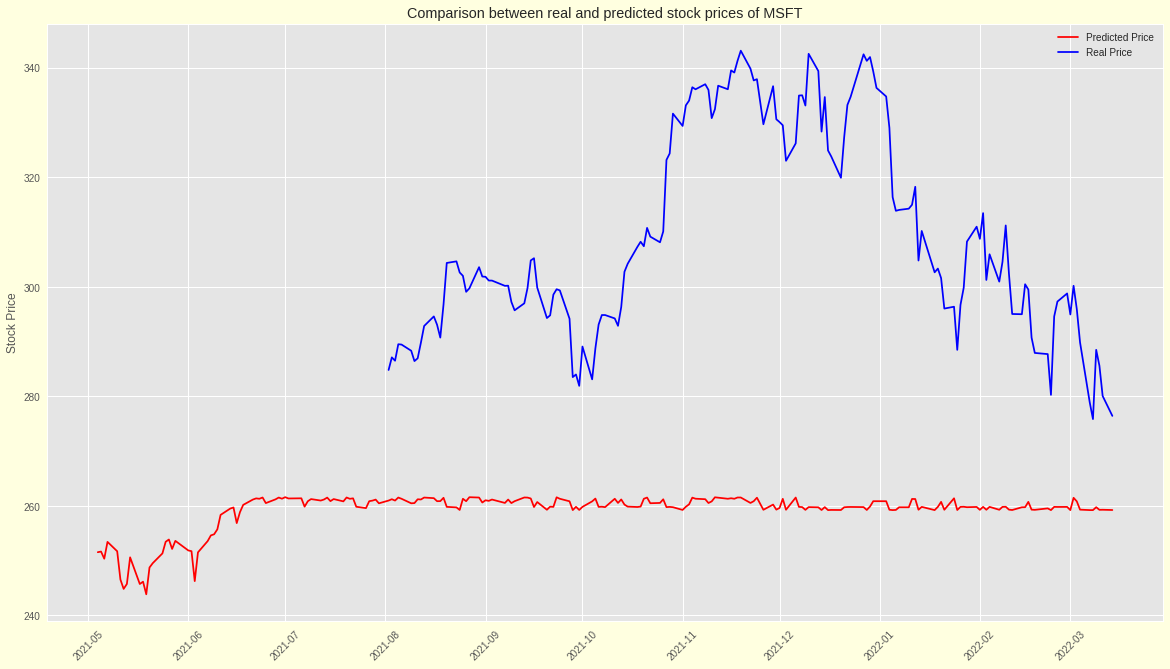

In [ ]:
y_pred_series = pd.Series(predict_MSFT, index=y_test.index)
fig = plt.figure(figsize = (20, 11), facecolor='lightyellow')
plt.plot(y_pred_series, color = 'red', label = 'Predicted Price')
plt.plot(data_MSFT['Close'][570:], color = 'blue', label = 'Real Price')
plt.ylabel("Stock Price")
plt.xticks(rotation=45)
plt.title('Comparison between real and predicted stock prices of MSFT')
plt.legend()
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_MSFT))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_MSFT))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_MSFT)))

Mean Absolute Error: 37.244660119572906
Mean Squared Error: 1976.8405261317296
Root Mean Squared Error: 44.46167480124573


Predict Stock Price of TSLA

[*********************100%***********************]  1 of 1 completed


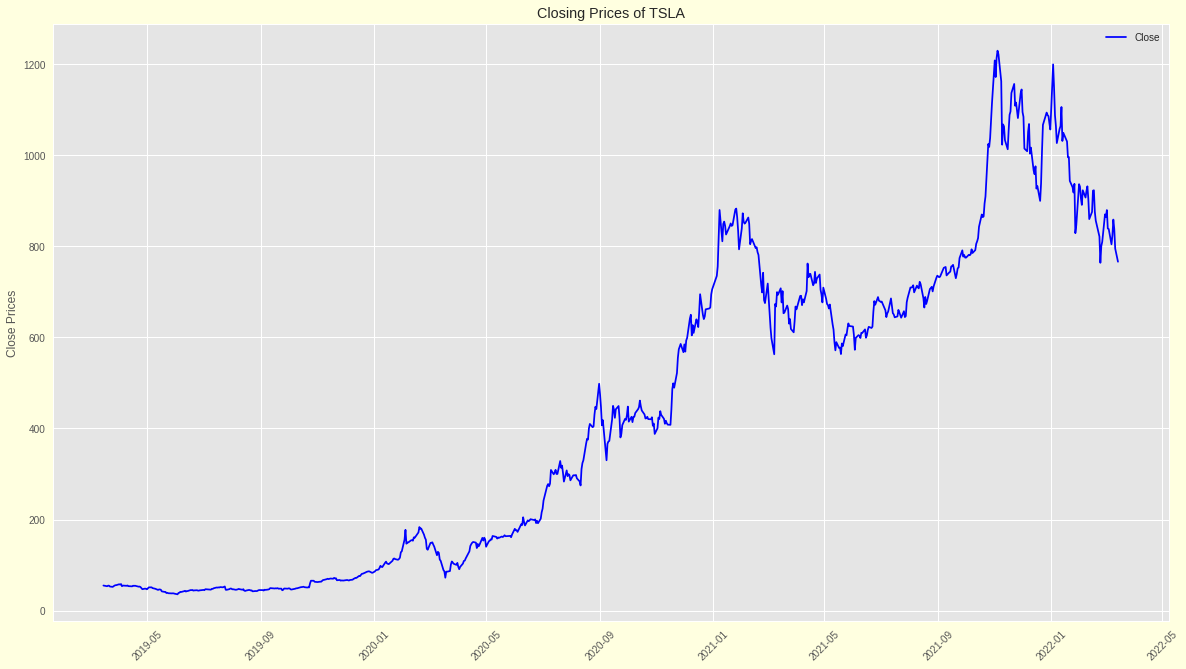

In [ ]:
# Download closing prices of TSLA
data_TSLA = yf.download("TSLA", start="2019-03-15", end="2022-03-15")[['Close','Volume','High','Low']].fillna(method='bfill')
fig = plt.figure(figsize = (20, 11), facecolor='lightyellow')
plt.plot(data_TSLA['Close'], color = 'blue', label = 'Close')
plt.xticks(rotation=45)
plt.ylabel("Close Prices")
plt.title('Closing Prices of TSLA')
plt.legend()
plt.show()

In [ ]:
data_TSLA['3day MA'] = data_TSLA['Close'].shift(1).rolling(window=3).mean()
data_TSLA['10day MA'] = data_TSLA['Close'].shift(1).rolling(window=10).mean()
data_TSLA['30day MA'] = data_TSLA['Close'].shift(1).rolling(window=30).mean()
data_TSLA['Std_dev'] = data_TSLA['Close'].rolling(5).std()
data_TSLA['Daily Return in percentage'] = data_TSLA['Close'].pct_change(1).fillna(0)
data_TSLA = data_TSLA[30:]

Feature Selection

In [ ]:
x = data_TSLA.iloc[:, 1:]
y = data_TSLA.iloc[:, 0]

train_size = int(0.70 * y.shape[0])
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model_TSLA = RandomForestRegressor()

grid_rf = {
'n_estimators': [20, 50, 100],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [44]
}
rscv_TSLA = RandomizedSearchCV(estimator=model_TSLA, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit_TSLA = rscv_TSLA.fit(x_train, y_train)
best_parameters_TSLA = rscv_fit_TSLA.best_params_
print(best_parameters_TSLA)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 44, 'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 6, 'bootstrap': False}


In [ ]:
model_TSLA = RandomForestRegressor(random_state=44, n_estimators=50,  min_samples_split=2, min_samples_leaf=1, max_depth=13, bootstrap=False)
model_TSLA.fit(x_train, y_train)
predict_TSLA = model_TSLA.predict(x_test)

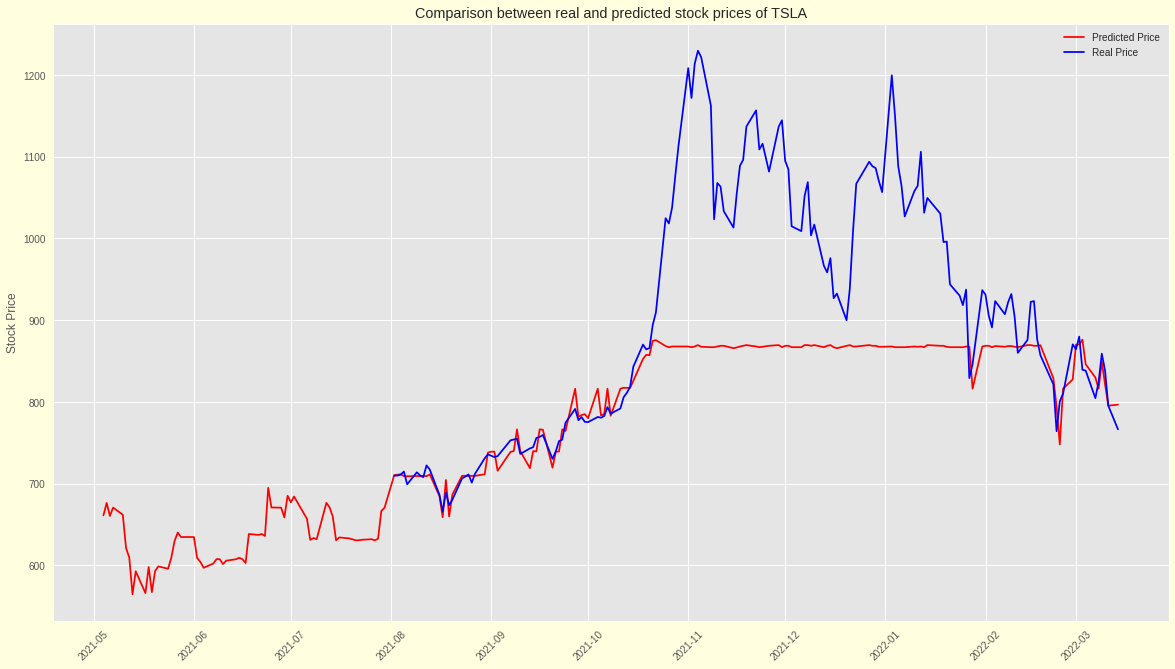

In [ ]:
y_pred_series = pd.Series(predict_TSLA, index=y_test.index)
fig = plt.figure(figsize = (20, 11), facecolor='lightyellow')
plt.plot(y_pred_series, color = 'red', label = 'Predicted Price')
plt.plot(data_TSLA['Close'][570:], color = 'blue', label = 'Real Price')
plt.ylabel("Stock Price")
plt.xticks(rotation=45)
plt.title('Comparison between real and predicted stock prices of TSLA')
plt.legend()
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_TSLA))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_TSLA))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_TSLA)))

Mean Absolute Error: 67.13132576198751
Mean Squared Error: 12953.279582131097
Root Mean Squared Error: 113.81247551183085


Predict Stock Price of TLW.L

[*********************100%***********************]  1 of 1 completed


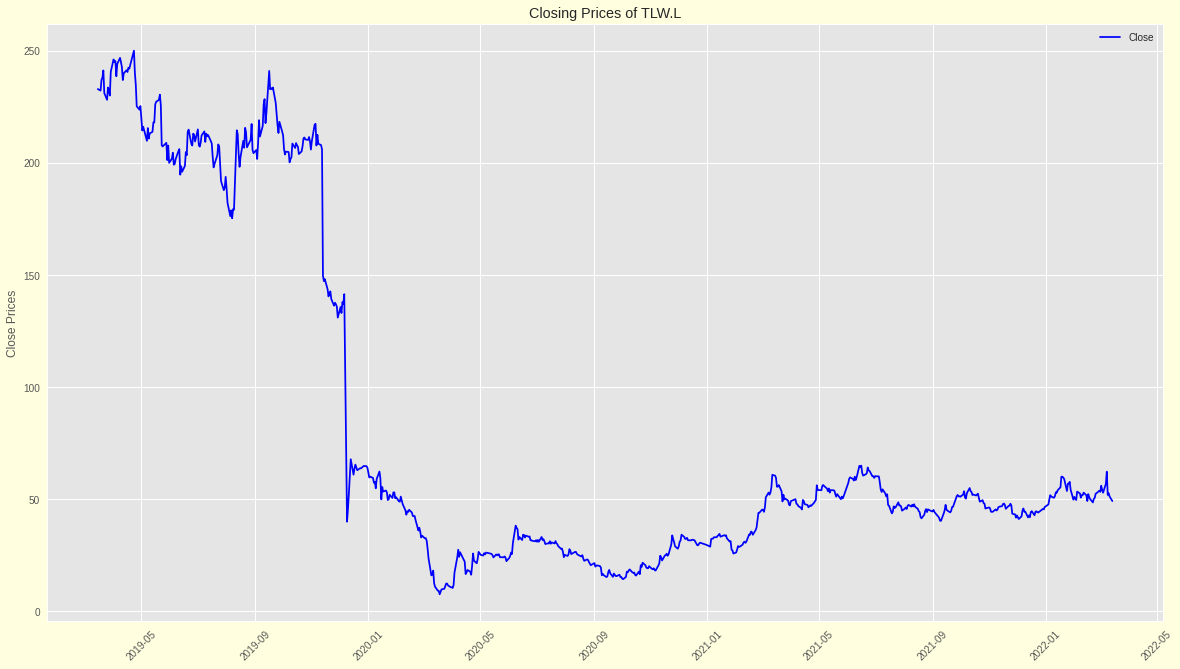

In [ ]:
# Download closing prices of TLW.L
data_TLW = yf.download("TLW.L", start="2019-03-15", end="2022-03-15")[['Close','Volume','High','Low']].fillna(method='bfill')
fig = plt.figure(figsize = (20, 11), facecolor='lightyellow')
plt.plot(data_TLW['Close'], color = 'blue', label = 'Close')
plt.xticks(rotation=45)
plt.ylabel("Close Prices")
plt.title('Closing Prices of TLW.L')
plt.legend()
plt.show()

In [ ]:
data_TLW['3day MA'] = data_TLW['Close'].shift(1).rolling(window=3).mean()
data_TLW['10day MA'] = data_TLW['Close'].shift(1).rolling(window=10).mean()
data_TLW['30day MA'] = data_TLW['Close'].shift(1).rolling(window=30).mean()
data_TLW['Std_dev'] = data_TLW['Close'].rolling(5).std()
data_TLW['Daily Return in percentage'] = data_TLW['Close'].pct_change(1).fillna(0)
data_TLW = data_TLW[30:]

Feature Selection

In [ ]:
x = data_TLW.iloc[:, 1:]
y = data_TLW.iloc[:, 0]

train_size = int(0.70 * y.shape[0])
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model_TLW = RandomForestRegressor()

grid_rf = {
'n_estimators': [20, 50, 100],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [45]
}
rscv_TLW = RandomizedSearchCV(estimator=model_TLW, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit_TLW = rscv_TLW.fit(x_train, y_train)
best_parameters_TLW = rscv_fit_TLW.best_params_
print(best_parameters_TLW)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 45, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 11, 'bootstrap': False}


In [ ]:
model_TLW = RandomForestRegressor(random_state=45, n_estimators=20,  min_samples_split=2, min_samples_leaf=1, max_depth=13, bootstrap=False)
model_TLW.fit(x_train, y_train)
predict_TLW = model_TLW.predict(x_test)

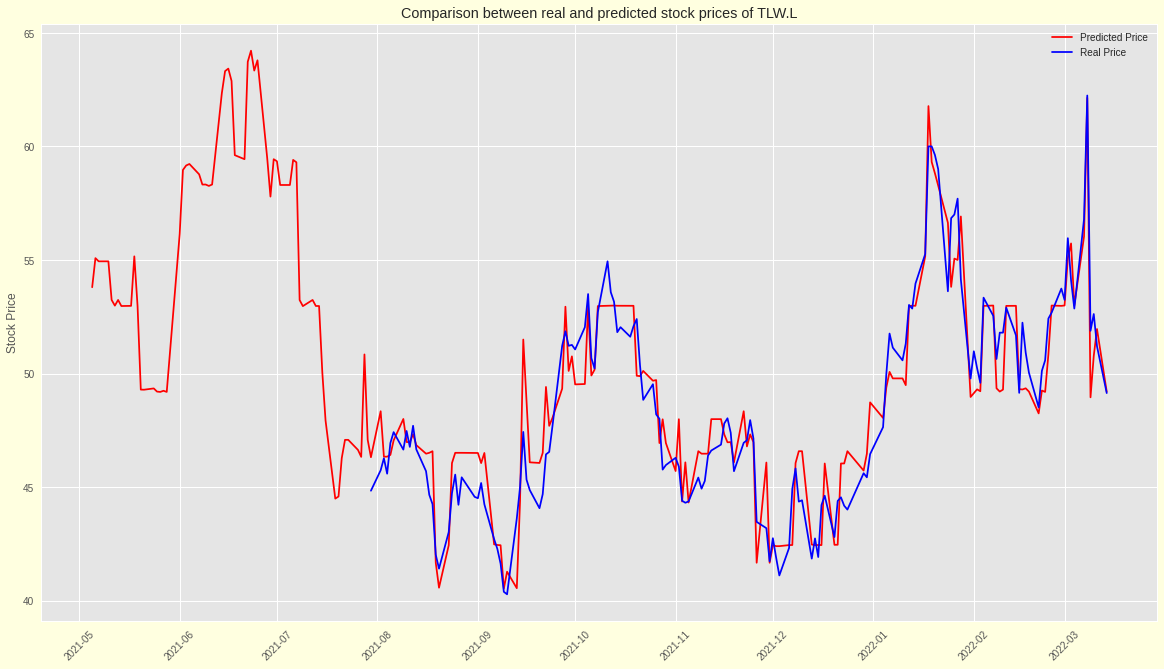

In [ ]:
y_pred_series = pd.Series(predict_TLW, index=y_test.index)
fig = plt.figure(figsize = (20, 11), facecolor='lightyellow')
plt.plot(y_pred_series, color = 'red', label = 'Predicted Price')
plt.plot(data_TLW['Close'][570:], color = 'blue', label = 'Real Price')
plt.ylabel("Stock Price")
plt.xticks(rotation=45)
plt.title('Comparison between real and predicted stock prices of TLW.L')
plt.legend()
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_TLW))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_TLW))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_TLW)))

Mean Absolute Error: 1.1750616256504842
Mean Squared Error: 2.1788415349097305
Root Mean Squared Error: 1.4760899481094405


#**END   OF    RANDOM    FOREST**

---



---



#LSTM

In [ ]:
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import datetime as dt

Predict Stock Price of GOOGL

[*********************100%***********************]  1 of 1 completed

No handles with labels found to put in legend.


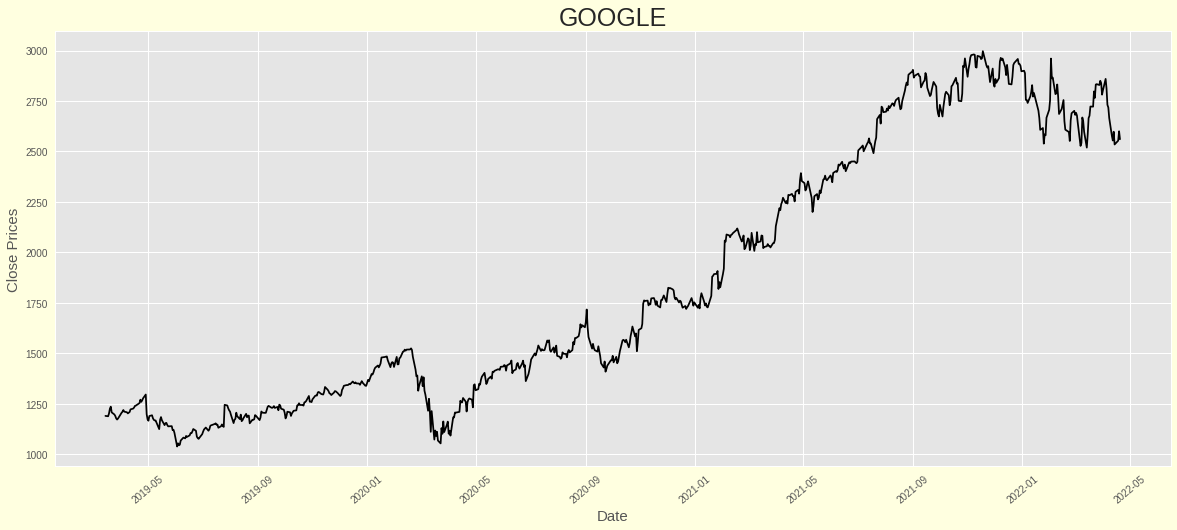

Date
2019-03-15    1190.300049
2019-03-18    1188.550049
2019-03-19    1202.459961
2019-03-20    1226.430054
2019-03-21    1236.130005
                 ...     
2022-04-13    2597.879883
2022-04-14    2534.600098
2022-04-18    2553.530029
2022-04-19    2600.179932
2022-04-20    2560.800049
Name: Close, Length: 782, dtype: float64

In [ ]:
#Data Download GOOGL
GooGdata = yf.download("GOOGL", start="2019-03-15", end="2022-04-21")[['Close','Volume','High','Low']].fillna(method='bfill')
fig = plt.figure(figsize = (20, 8), facecolor='lightyellow')
plt.plot(GooGdata['Close'], color = 'black')
plt.xticks(rotation=40)
plt.ylabel("Close Prices", size = 15)
plt.xlabel("Date", size = 15)
plt.title('GOOGLE', size = 25)
plt.legend()
plt.show()
GooGdata['Close']

In [ ]:
#Data Download Google
GooGdata['20day MA'] = GooGdata['Close'].shift(1).rolling(window=20).mean()
GooGdata['30day MA'] = GooGdata['Close'].shift(1).rolling(window=30).mean()
GooGdata['50day MA'] = GooGdata['Close'].shift(1).rolling(window=50).mean()
GooGdata['Std_dev'] = GooGdata['Close'].rolling(5).std()
GooGdata['Daily Return in %'] = GooGdata['Close'].pct_change(1).fillna(0)

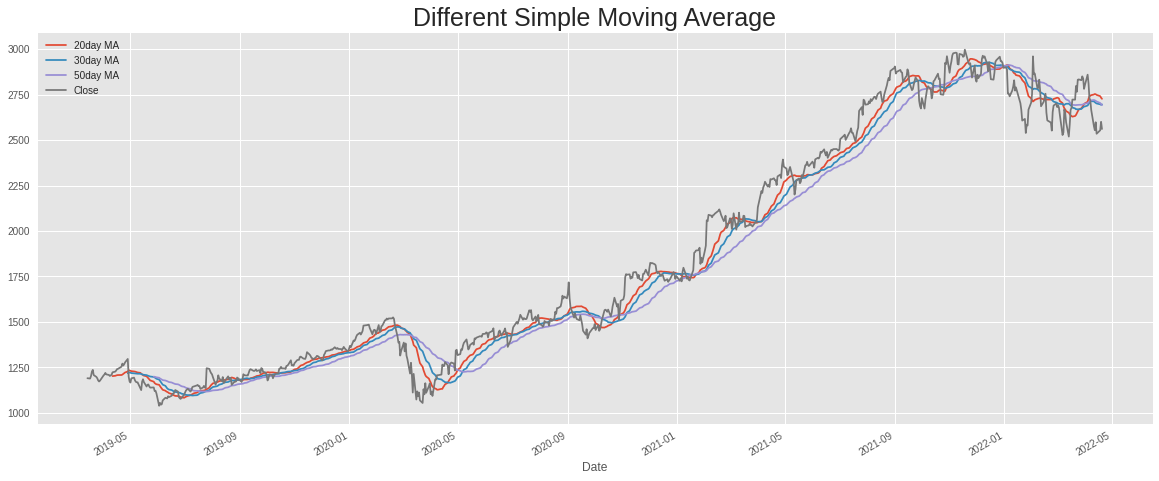

In [ ]:
#simple moving average
GooGdata.index = pd.to_datetime(GooGdata.index)
GooGdata['20day MA'] = GooGdata['Close'].shift(1).rolling(window=20).mean()
GooGdata['30day MA'] = GooGdata['Close'].shift(1).rolling(window=30).mean()
GooGdata['50day MA'] = GooGdata['Close'].shift(1).rolling(window=50).mean()
GooGdata[['20day MA','30day MA','50day MA','Close']].plot(figsize = (20, 8))
plt.title('Different Simple Moving Average', size=25)
plt.show()

In [ ]:
GOOGL_close = GooGdata.filter(['Close']).values
 
#Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(GOOGL_close)
 
# Training 70% of the data
training_data_len = math.ceil(len(GOOGL_close) *.70)
train_data = scaled_data[0:training_data_len  , : ]
 
# Separate the data
xtraindata =[]
ytraindata =[]
for i in range(30,len(train_data)):
    xtraindata=list(xtraindata)
    ytraindata=list(ytraindata)
    xtraindata.append(train_data[i-30:i,0])
    ytraindata.append(train_data[i,0])
 
# Convert to numpy arrays
xtraindata1, ytraindata1 = np.array(xtraindata), np.array(ytraindata)
 
# Reshape training x and y data
xtraindata2 = np.reshape(xtraindata1, (xtraindata1.shape[0],xtraindata1.shape[1],1))


In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(xtraindata2.shape[1], xtraindata2.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [ ]:
# Testing dataset
test_data = scaled_data[training_data_len - 30: , : ]
x_test = []
y_test =  GOOGL_close[training_data_len : , : ]
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])
 
# converting into arrays
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
history = model.fit(xtraindata2, ytraindata1, epochs=50, batch_size=10, verbose=2, shuffle=False)

Epoch 1/50
52/52 - 3s - loss: 0.0285 - 3s/epoch - 67ms/step
Epoch 2/50
52/52 - 1s - loss: 0.0340 - 1s/epoch - 20ms/step
Epoch 3/50
52/52 - 1s - loss: 0.0343 - 1s/epoch - 23ms/step
Epoch 4/50
52/52 - 1s - loss: 0.0264 - 1s/epoch - 20ms/step
Epoch 5/50
52/52 - 1s - loss: 0.0246 - 1s/epoch - 21ms/step
Epoch 6/50
52/52 - 1s - loss: 0.0216 - 1s/epoch - 25ms/step
Epoch 7/50
52/52 - 1s - loss: 0.0207 - 1s/epoch - 20ms/step
Epoch 8/50
52/52 - 1s - loss: 0.0187 - 1s/epoch - 19ms/step
Epoch 9/50
52/52 - 1s - loss: 0.0155 - 1s/epoch - 19ms/step
Epoch 10/50
52/52 - 1s - loss: 0.0216 - 980ms/epoch - 19ms/step
Epoch 11/50
52/52 - 1s - loss: 0.0183 - 983ms/epoch - 19ms/step
Epoch 12/50
52/52 - 1s - loss: 0.0152 - 1s/epoch - 21ms/step
Epoch 13/50
52/52 - 1s - loss: 0.0183 - 945ms/epoch - 18ms/step
Epoch 14/50
52/52 - 1s - loss: 0.0196 - 1s/epoch - 21ms/step
Epoch 15/50
52/52 - 1s - loss: 0.0151 - 1s/epoch - 22ms/step
Epoch 16/50
52/52 - 1s - loss: 0.0141 - 1s/epoch - 22ms/step
Epoch 17/50
52/52 - 1s -

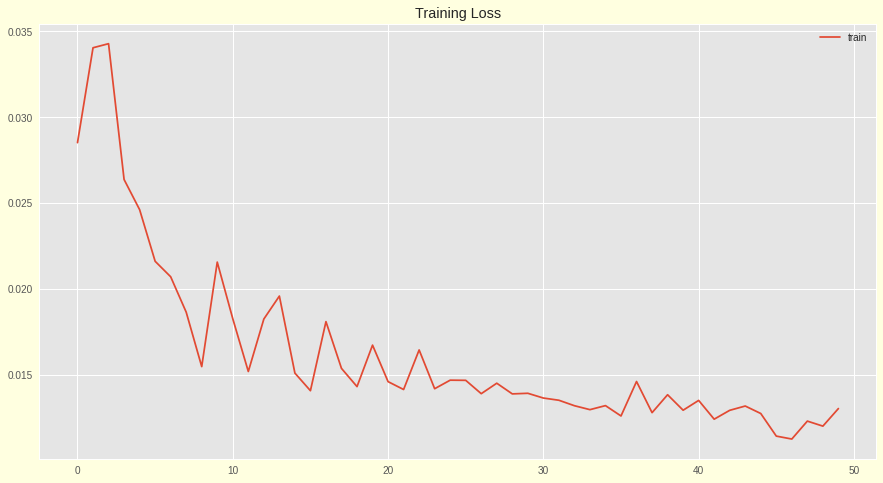

In [ ]:
# plot training history
fig = plt.figure(figsize = (15, 8), facecolor='lightyellow')
plt.plot(history.history['loss'], label='train')
plt.title('Training Loss')
plt.legend()
plt.show()

In [ ]:
predictGOOG = model.predict(x_test)
predictGOOG = scaler.inverse_transform(predictGOOG)
#print(predictGOOG)
#print(predictGOOG.shape)

In [ ]:
rmse=np.sqrt(np.mean(((predictGOOG- y_test)**2)))
print(rmse)

79.31013400965492


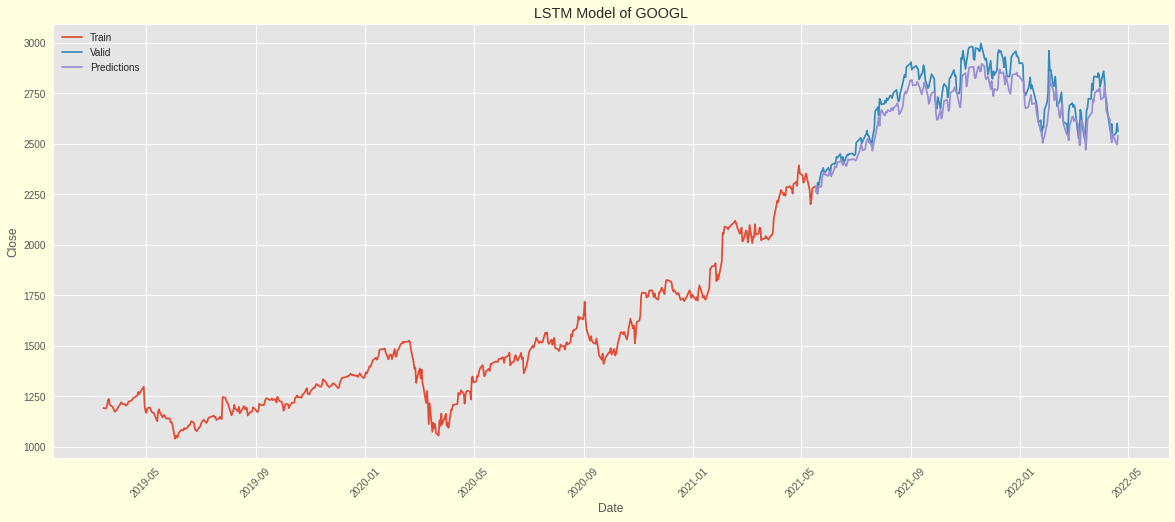

In [ ]:
train = GooGdata[:training_data_len]
valid = GooGdata[training_data_len:]
 
valid['Predictions'] = predictGOOG
fig = plt.figure(figsize = (20, 8), facecolor='lightyellow')
plt.title('LSTM Model of GOOGL')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
 
plt.legend(['Train', 'Valid', 'Predictions'], loc='best')
plt.xticks(rotation=45)
plt.show();

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictGOOG))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictGOOG))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictGOOG)))

Mean Absolute Error: 67.44454564803686
Mean Squared Error: 6290.097356629422
Root Mean Squared Error: 79.31013400965492


In [ ]:
valid[['Close', 'Predictions']]

Close  Predictions
Date                                
2021-05-18  2262.469971  2281.741211
2021-05-19  2271.500000  2253.321289
2021-05-20  2306.949951  2250.691406
2021-05-21  2294.129883  2285.579834
2021-05-24  2361.040039  2286.646973
...                 ...          ...
2022-04-13  2597.879883  2506.180664
2022-04-14  2534.600098  2546.601562
2022-04-18  2553.530029  2502.476318
2022-04-19  2600.179932  2495.766113
2022-04-20  2560.800049  2539.950195

[234 rows x 2 columns]

In [ ]:
errors = abs(predictGOOG - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy: 97.57 %.


Predict Stock Price of MSFT

[*********************100%***********************]  1 of 1 completed

No handles with labels found to put in legend.


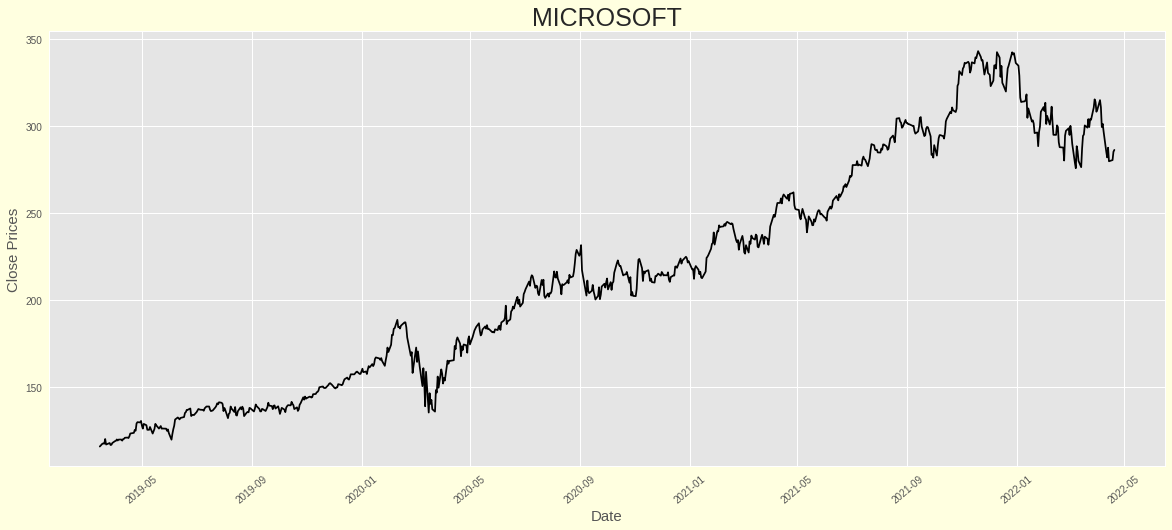

In [ ]:
#Data Download MSFT
MSFTdata= yf.download("MSFT", start="2019-03-15", end="2022-04-21")[['Close','Volume','High','Low']].fillna(method='bfill')
fig = plt.figure(figsize = (20, 8), facecolor='lightyellow')
plt.plot(MSFTdata['Close'], color = 'black')
plt.xticks(rotation=40)
plt.ylabel("Close Prices", size = 15)
plt.xlabel("Date", size = 15)
plt.title('MICROSOFT', size = 25)
plt.legend()
plt.show()

In [ ]:
MSFTdata['20day MA'] = MSFTdata['Close'].shift(1).rolling(window=20).mean()
MSFTdata['30day MA'] = MSFTdata['Close'].shift(1).rolling(window=30).mean()
MSFTdata['50day MA'] = MSFTdata['Close'].shift(1).rolling(window=50).mean()
MSFTdata['Std_dev'] = MSFTdata['Close'].rolling(5).std()
MSFTdata['Daily Return in percentage'] = MSFTdata['Close'].pct_change(1).fillna(0)

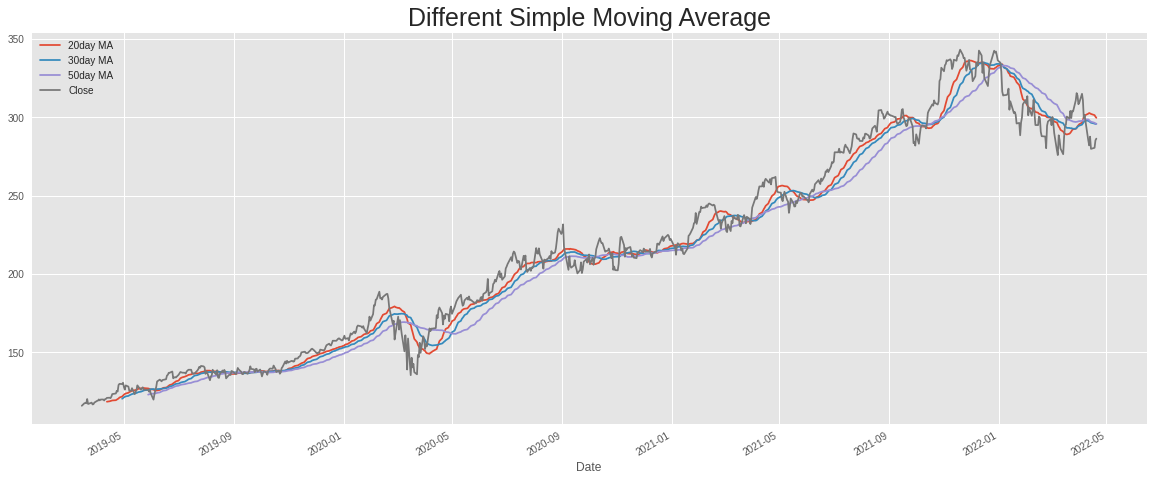

In [ ]:
#simple moving average
MSFTdata.index = pd.to_datetime(MSFTdata.index)
MSFTdata['20day MA'] = MSFTdata['Close'].shift(1).rolling(window=20).mean()
MSFTdata['30day MA'] = MSFTdata['Close'].shift(1).rolling(window=30).mean()
MSFTdata['50day MA'] = MSFTdata['Close'].shift(1).rolling(window=50).mean()
MSFTdata[['20day MA','30day MA','50day MA','Close']].plot(figsize = (20, 8))
plt.title('Different Simple Moving Average', size=25)
plt.show()

In [ ]:
MSFT_close = MSFTdata.filter(['Close']).values
 
#Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(MSFT_close)
 
# Training 70% of the data
training_data_len = math.ceil(len(GOOGL_close) *.70)
train_data = scaled_data[0:training_data_len  , : ]
 
# Separate the data
xtraindata=[]
ytraindata =[]
for i in range(30,len(train_data)):
    xtraindata=list(xtraindata)
    ytraindata=list(ytraindata)
    xtraindata.append(train_data[i-30:i,0])
    ytraindata.append(train_data[i,0])
 
# Convert to numpy arrays
xtraindata1, ytraindata1 = np.array(xtraindata), np.array(ytraindata)
 
# Reshape training x and y data 
xtraindata2 = np.reshape(xtraindata1, (xtraindata1.shape[0],xtraindata1.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(xtraindata2.shape[1], xtraindata2.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [ ]:
# Testing dataset
test_data = scaled_data[training_data_len - 30: , : ]
x_test = []
y_test =  MSFT_close[training_data_len : , : ]
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])
 
# converting into arrays
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
history = model.fit(xtraindata2, ytraindata1, epochs=50, batch_size=10, verbose=2, shuffle=False)

Epoch 1/50
52/52 - 3s - loss: 0.0328 - 3s/epoch - 51ms/step
Epoch 2/50
52/52 - 1s - loss: 0.0640 - 605ms/epoch - 12ms/step
Epoch 3/50
52/52 - 1s - loss: 0.0518 - 618ms/epoch - 12ms/step
Epoch 4/50
52/52 - 1s - loss: 0.0409 - 628ms/epoch - 12ms/step
Epoch 5/50
52/52 - 1s - loss: 0.0298 - 615ms/epoch - 12ms/step
Epoch 6/50
52/52 - 1s - loss: 0.0308 - 622ms/epoch - 12ms/step
Epoch 7/50
52/52 - 1s - loss: 0.0296 - 629ms/epoch - 12ms/step
Epoch 8/50
52/52 - 1s - loss: 0.0263 - 632ms/epoch - 12ms/step
Epoch 9/50
52/52 - 1s - loss: 0.0257 - 630ms/epoch - 12ms/step
Epoch 10/50
52/52 - 1s - loss: 0.0257 - 622ms/epoch - 12ms/step
Epoch 11/50
52/52 - 1s - loss: 0.0249 - 615ms/epoch - 12ms/step
Epoch 12/50
52/52 - 1s - loss: 0.0224 - 632ms/epoch - 12ms/step
Epoch 13/50
52/52 - 1s - loss: 0.0203 - 616ms/epoch - 12ms/step
Epoch 14/50
52/52 - 1s - loss: 0.0207 - 613ms/epoch - 12ms/step
Epoch 15/50
52/52 - 1s - loss: 0.0187 - 612ms/epoch - 12ms/step
Epoch 16/50
52/52 - 1s - loss: 0.0235 - 622ms/epoch 

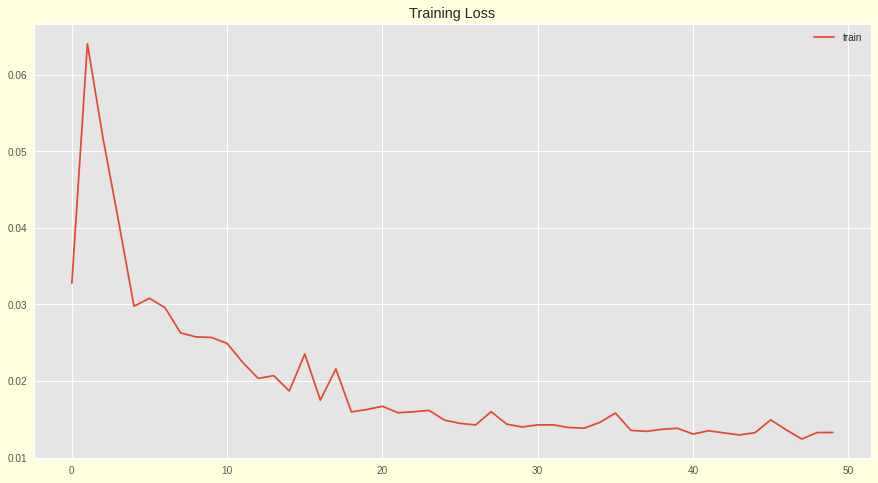

In [ ]:
# plot training history
fig = plt.figure(figsize = (15, 8), facecolor='lightyellow')
plt.plot(history.history['loss'], label='train')
plt.title('Training Loss')
plt.legend()
plt.show()

In [ ]:
predict_MSFT = model.predict(x_test)
predict_MSFT = scaler.inverse_transform(predict_MSFT)

In [ ]:
rmse=np.sqrt(np.mean(((predict_MSFT- y_test)**2)))
print(rmse)

10.233440644707681


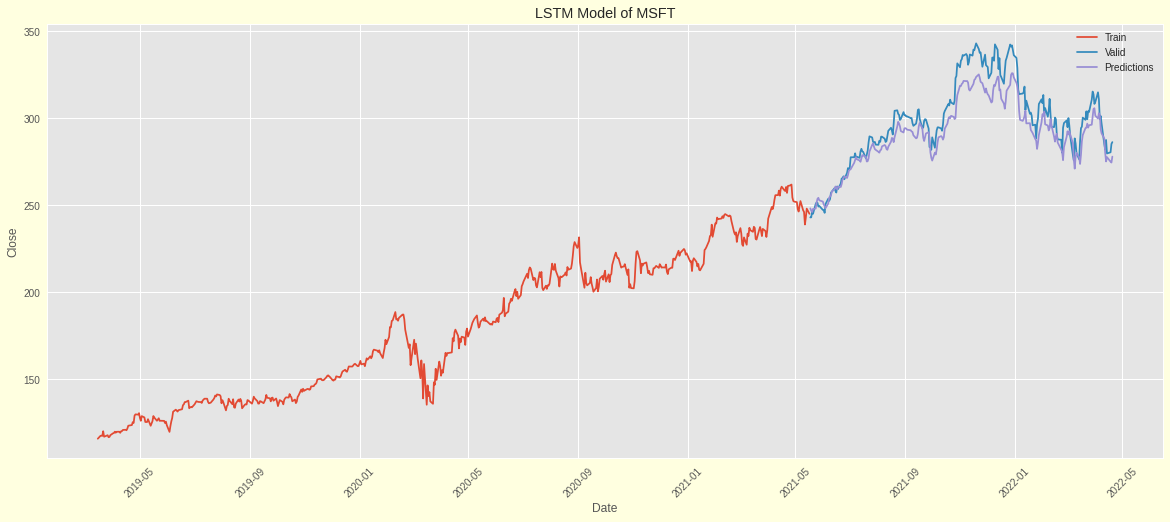

In [ ]:
train = MSFTdata[:training_data_len]
valid = MSFTdata[training_data_len:]
 
valid['Predictions'] = predict_MSFT
plt.figure(figsize = (20, 8),facecolor='lightyellow')
plt.title('LSTM Model of MSFT')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
 
plt.legend(['Train', 'Valid', 'Predictions'], loc='best')
plt.xticks(rotation=45)
plt.show();

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_MSFT))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_MSFT))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_MSFT)))

Mean Absolute Error: 8.350115588587574
Mean Squared Error: 104.72330742875516
Root Mean Squared Error: 10.233440644707681


In [ ]:
valid[['Close', 'Predictions']]

Close  Predictions
Date                               
2021-05-18  243.080002   248.299011
2021-05-19  243.119995   246.946533
2021-05-20  246.479996   246.196136
2021-05-21  245.169998   247.963196
2021-05-24  250.779999   248.177994
...                ...          ...
2022-04-13  287.619995   275.241028
2022-04-14  279.829987   277.743042
2022-04-18  280.519989   275.123230
2022-04-19  285.299988   274.625885
2022-04-20  286.359985   278.009735

[234 rows x 2 columns]

In [ ]:
errors = abs(predict_MSFT - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy: 97.3 %.


Predict Stock Price of TSLA

[*********************100%***********************]  1 of 1 completed

No handles with labels found to put in legend.


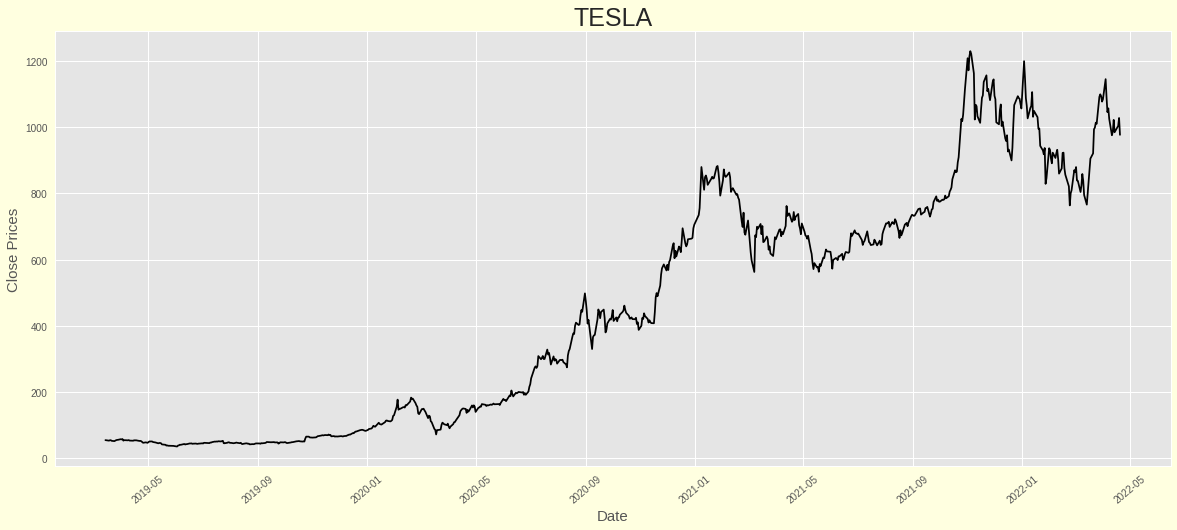

In [ ]:
TESdata = yf.download("TSLA", start="2019-03-15", end="2022-04-21")[['Close','Volume','High','Low']].fillna(method='bfill')
fig = plt.figure(figsize = (20, 8), facecolor='lightyellow')
plt.plot(TESdata['Close'], color = 'black')
plt.xticks(rotation=40)
plt.ylabel("Close Prices", size = 15)
plt.xlabel("Date", size = 15)
plt.title('TESLA', size = 25)
plt.legend()
plt.show()

In [ ]:
TESdata['20day MA'] =TESdata['Close'].shift(1).rolling(window=20).mean()
TESdata['30day MA'] = TESdata['Close'].shift(1).rolling(window=30).mean()
TESdata['50day MA'] = TESdata['Close'].shift(1).rolling(window=50).mean()
TESdata['Std_dev'] = TESdata['Close'].rolling(5).std()
TESdata['Daily Return in percentage'] = TESdata['Close'].pct_change(1).fillna(0)

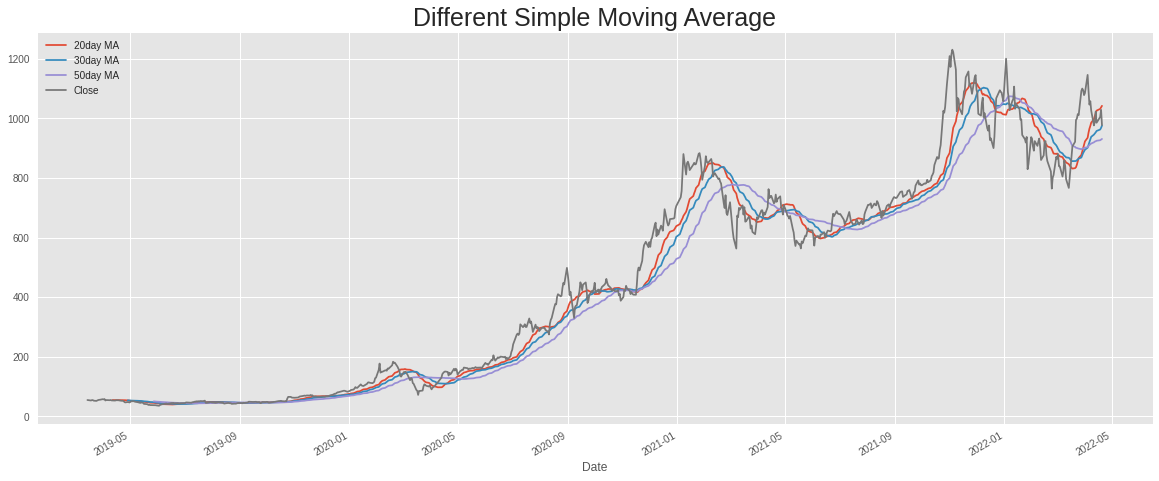

In [ ]:
TESdata.index = pd.to_datetime(TESdata.index)
TESdata['20day MA'] = TESdata['Close'].shift(1).rolling(window=20).mean()
TESdata['30day MA'] = TESdata['Close'].shift(1).rolling(window=30).mean()
TESdata['50day MA'] = TESdata['Close'].shift(1).rolling(window=50).mean()
TESdata[['20day MA','30day MA','50day MA','Close']].plot(figsize = (20, 8))
plt.title('Different Simple Moving Average', size=25)
plt.show()

In [ ]:
TSLA_close = TESdata.filter(['Close']).values
 
#Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(TSLA_close)
 
# Training 70% of the data
training_data_len = math.ceil(len(TSLA_close) *.70)
train_data = scaled_data[0:training_data_len  , : ]
 
# Separate the data
xtraindata=[]
ytraindata =[]
for i in range(30,len(train_data)):
    xtraindata=list(xtraindata)
    ytraindata=list(ytraindata)
    xtraindata.append(train_data[i-30:i,0])
    ytraindata.append(train_data[i,0])
 
# Convert to numpy arrays
xtraindata1, ytraindata1 = np.array(xtraindata), np.array(ytraindata)
 
# Reshape training x and y data 
xtraindata2 = np.reshape(xtraindata1, (xtraindata1.shape[0],xtraindata1.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(xtraindata2.shape[1], xtraindata2.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [ ]:
# Testing dataset
test_data = scaled_data[training_data_len - 30: , : ]
x_test = []
y_test =  TSLA_close[training_data_len : , : ]
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])
 
# converting into arrays
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
history = model.fit(xtraindata2, ytraindata1, epochs=50, batch_size=10, verbose=2, shuffle=False)

Epoch 1/50
52/52 - 3s - loss: 0.0252 - 3s/epoch - 51ms/step
Epoch 2/50
52/52 - 1s - loss: 0.0350 - 614ms/epoch - 12ms/step
Epoch 3/50
52/52 - 1s - loss: 0.0638 - 640ms/epoch - 12ms/step
Epoch 4/50
52/52 - 1s - loss: 0.0582 - 609ms/epoch - 12ms/step
Epoch 5/50
52/52 - 1s - loss: 0.0565 - 625ms/epoch - 12ms/step
Epoch 6/50
52/52 - 1s - loss: 0.0438 - 618ms/epoch - 12ms/step
Epoch 7/50
52/52 - 1s - loss: 0.0427 - 614ms/epoch - 12ms/step
Epoch 8/50
52/52 - 1s - loss: 0.0430 - 628ms/epoch - 12ms/step
Epoch 9/50
52/52 - 1s - loss: 0.0358 - 628ms/epoch - 12ms/step
Epoch 10/50
52/52 - 1s - loss: 0.0343 - 621ms/epoch - 12ms/step
Epoch 11/50
52/52 - 1s - loss: 0.0324 - 620ms/epoch - 12ms/step
Epoch 12/50
52/52 - 1s - loss: 0.0288 - 608ms/epoch - 12ms/step
Epoch 13/50
52/52 - 1s - loss: 0.0263 - 617ms/epoch - 12ms/step
Epoch 14/50
52/52 - 1s - loss: 0.0219 - 618ms/epoch - 12ms/step
Epoch 15/50
52/52 - 1s - loss: 0.0186 - 625ms/epoch - 12ms/step
Epoch 16/50
52/52 - 1s - loss: 0.0205 - 624ms/epoch 

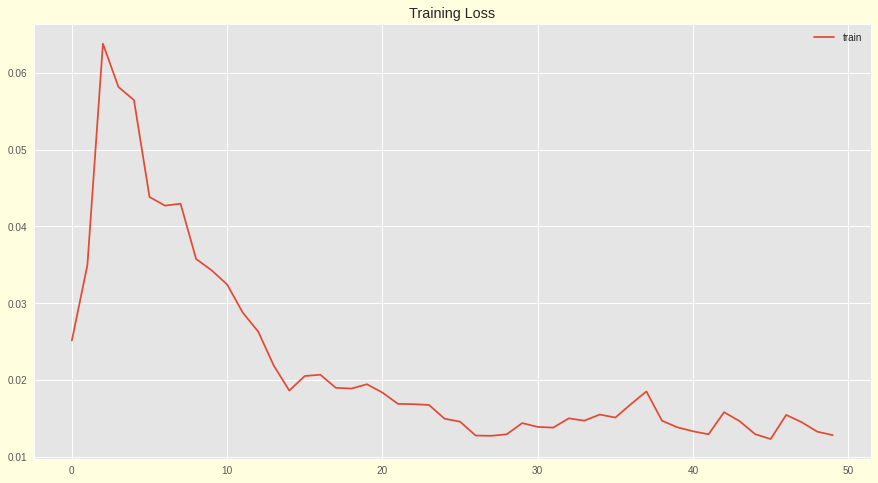

In [ ]:
# plot training history
fig = plt.figure(figsize = (15, 8), facecolor='lightyellow')
plt.plot(history.history['loss'], label='train')
plt.title('Training Loss')
plt.legend()
plt.show()

In [ ]:
predict_TSLA = model.predict(x_test)
predict_TSLA = scaler.inverse_transform(predict_TSLA)

In [ ]:
rmse=np.sqrt(np.mean(((predict_TSLA- y_test)**2)))
print(rmse)

41.87728589443062


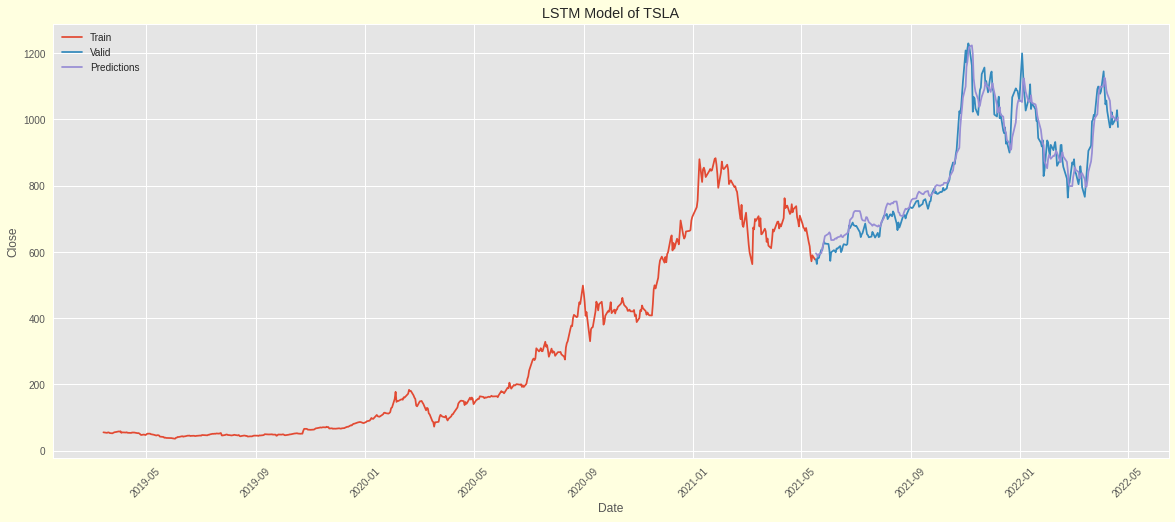

In [ ]:
train = TESdata[:training_data_len]
valid = TESdata[training_data_len:]
 
valid['Predictions'] = predict_TSLA
fig = plt.figure(figsize = (20, 8), facecolor='lightyellow')
plt.title('LSTM Model of TSLA')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
 
plt.legend(['Train', 'Valid', 'Predictions'], loc='best')
plt.xticks(rotation=45)
plt.show();

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_TSLA))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_TSLA))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_TSLA)))

Mean Absolute Error: 33.071717351929756
Mean Squared Error: 1753.707073883878
Root Mean Squared Error: 41.87728589443062


In [ ]:
valid[['Close', 'Predictions']]

Close  Predictions
Date                                
2021-05-18   577.869995   595.679565
2021-05-19   563.460022   592.731934
2021-05-20   586.780029   585.764160
2021-05-21   580.880005   592.783081
2021-05-24   606.440002   596.119995
...                 ...          ...
2022-04-13  1022.369995  1005.675842
2022-04-14   985.000000  1011.138000
2022-04-18  1004.289978   996.859802
2022-04-19  1028.150024   996.506653
2022-04-20   977.200012  1005.879822

[234 rows x 2 columns]

In [ ]:
errors = abs(predict_TSLA - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy: 96.09 %.


Predict Stock Price of TLW.L

[*********************100%***********************]  1 of 1 completed


No handles with labels found to put in legend.


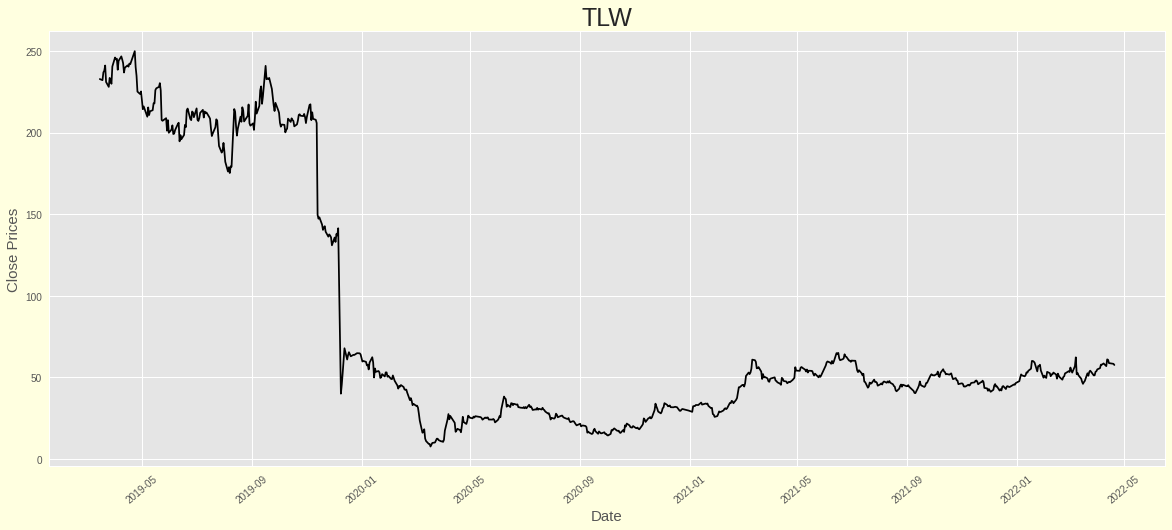

In [ ]:
#Data Download TLW.L
TLWdata= yf.download("TLW.L", start="2019-03-15", end="2022-04-21")[['Close','Volume','High','Low']].fillna(method='bfill')
fig = plt.figure(figsize = (20, 8), facecolor='lightyellow')
plt.plot(TLWdata['Close'], color = 'black')
plt.xticks(rotation=40)
plt.ylabel("Close Prices", size = 15)
plt.xlabel("Date", size = 15)
plt.title('TLW', size = 25)
plt.legend()
plt.show()

In [ ]:
TLWdata['20day MA'] = TLWdata['Close'].shift(1).rolling(window=20).mean()
TLWdata['30day MA'] = TLWdata['Close'].shift(1).rolling(window=30).mean()
TLWdata['50day MA'] = TLWdata['Close'].shift(1).rolling(window=50).mean()
TLWdata['Std_dev'] = TLWdata['Close'].rolling(5).std()
TLWdata['Daily Return in percentage'] = TLWdata['Close'].pct_change(1).fillna(0)
TLWdata

Close    Volume        High         Low  20day MA   30day MA  \
Date                                                                            
2019-03-15  232.899994   9402158  239.000000  227.600006       NaN        NaN   
2019-03-18  232.199997   3784630  235.699997  229.300003       NaN        NaN   
2019-03-19  237.000000   5638902  237.500000  231.500000       NaN        NaN   
2019-03-20  238.000000   5845149  239.399994  235.399994       NaN        NaN   
2019-03-21  241.199997   6164244  241.899994  237.800003       NaN        NaN   
...                ...       ...         ...         ...       ...        ...   
2022-04-12   61.000000  13936013   61.000000   56.796001    53.043  53.363333   
2022-04-13   60.700001   9085353   62.150002   59.851002    53.730  53.622000   
2022-04-14   58.700001   5709670   60.779999   58.700001    54.466  53.780000   
2022-04-19   58.250000   6407768   60.070000   57.349998    55.051  53.933333   
2022-04-20   57.549999   3263688   58.700001   57.250000    55.577  54.113000   

            50day MA   Std_dev  Daily Return in percentage  
Date                                                        
2019-03-15       NaN       NaN                    0.000000  
2019-03-18       NaN       NaN                   -0.003006  
2019-03-19       NaN       NaN                    0.020672  
2019-03-20       NaN       NaN                    0.004219  
2019-03-21       NaN  3.733364                    0.013445  
...              ...       ...                         ...  
2022-04-12   52.5362  1.561090                    0.072999  
2022-04-13   52.7366  1.772570                   -0.004918  
2022-04-14   52.9458  1.713185                   -0.032949  
2022-04-19   53.1280  1.740331                   -0.007666  
2022-04-20   53.2262  1.529461                   -0.012017  

[783 rows x 9 columns]

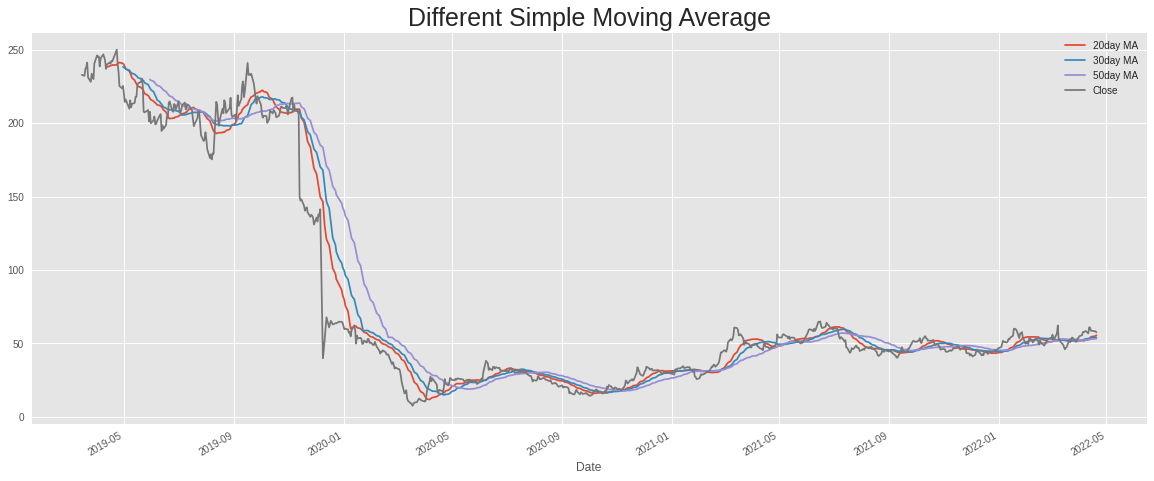

In [ ]:
TLWdata.index = pd.to_datetime(TLWdata.index)
TLWdata['20day MA'] = TLWdata['Close'].shift(1).rolling(window=20).mean()
TLWdata['30day MA'] = TLWdata['Close'].shift(1).rolling(window=30).mean()
TLWdata['50day MA'] = TLWdata['Close'].shift(1).rolling(window=50).mean()
TLWdata[['20day MA','30day MA','50day MA','Close']].plot(figsize = (20, 8))
plt.title('Different Simple Moving Average', size=25)
plt.show()

In [ ]:
TLW_close = TLWdata.filter(['Close']).values
 
#Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(TLW_close)
 
# Training 70% of the data
training_data_len = math.ceil(len(TLW_close) *.70)
train_data = scaled_data[0:training_data_len  , : ]
 
# Separate the data
xtraindata=[]
ytraindata =[]
for i in range(30,len(train_data)):
    xtraindata=list(xtraindata)
    ytraindata=list(ytraindata)
    xtraindata.append(train_data[i-30:i,0])
    ytraindata.append(train_data[i,0])
 
# Convert to numpy arrays
xtraindata1, ytraindata1 = np.array(xtraindata), np.array(ytraindata)
 
# Reshape training x and y data 
xtraindata2 = np.reshape(xtraindata1, (xtraindata1.shape[0],xtraindata1.shape[1],1))


In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(xtraindata2.shape[1], xtraindata2.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [ ]:
# Testing dataset
test_data = scaled_data[training_data_len - 30: , : ]
x_test = []
y_test =  TLW_close[training_data_len : , : ]
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])
 
# converting into arrays
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
history = model.fit(xtraindata2, ytraindata1, epochs=50, batch_size=10, verbose=2, shuffle=False)

Epoch 1/50
52/52 - 3s - loss: 0.1865 - 3s/epoch - 51ms/step
Epoch 2/50
52/52 - 1s - loss: 0.1073 - 627ms/epoch - 12ms/step
Epoch 3/50
52/52 - 1s - loss: 0.1169 - 627ms/epoch - 12ms/step
Epoch 4/50
52/52 - 1s - loss: 0.0394 - 634ms/epoch - 12ms/step
Epoch 5/50
52/52 - 1s - loss: 0.1099 - 631ms/epoch - 12ms/step
Epoch 6/50
52/52 - 1s - loss: 0.0237 - 670ms/epoch - 13ms/step
Epoch 7/50
52/52 - 1s - loss: 0.0658 - 632ms/epoch - 12ms/step
Epoch 8/50
52/52 - 1s - loss: 0.0601 - 646ms/epoch - 12ms/step
Epoch 9/50
52/52 - 1s - loss: 0.0418 - 652ms/epoch - 13ms/step
Epoch 10/50
52/52 - 1s - loss: 0.0746 - 621ms/epoch - 12ms/step
Epoch 11/50
52/52 - 1s - loss: 0.0281 - 630ms/epoch - 12ms/step
Epoch 12/50
52/52 - 1s - loss: 0.0624 - 647ms/epoch - 12ms/step
Epoch 13/50
52/52 - 1s - loss: 0.0424 - 620ms/epoch - 12ms/step
Epoch 14/50
52/52 - 1s - loss: 0.0514 - 635ms/epoch - 12ms/step
Epoch 15/50
52/52 - 1s - loss: 0.0514 - 636ms/epoch - 12ms/step
Epoch 16/50
52/52 - 1s - loss: 0.0342 - 618ms/epoch 

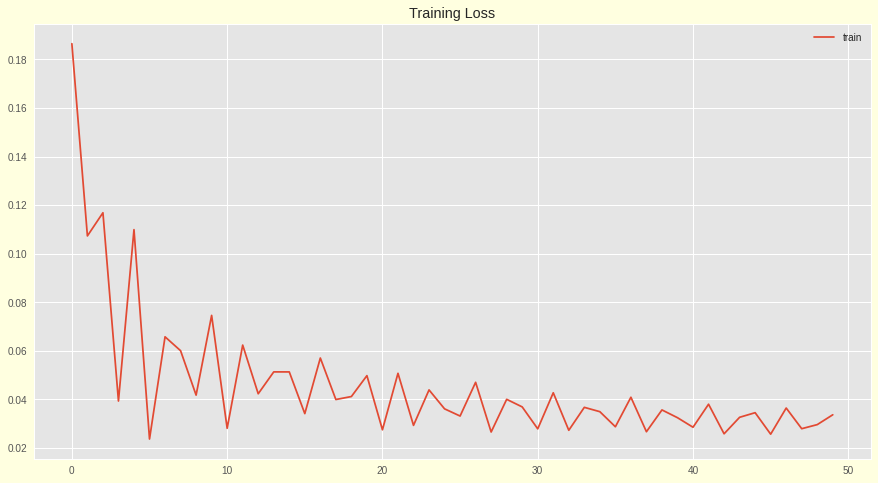

In [ ]:
# plot training history
fig = plt.figure(figsize = (15, 8), facecolor='lightyellow')
plt.plot(history.history['loss'], label='train')
plt.title('Training Loss')
plt.legend()
plt.show()

In [ ]:
predict_TLW = model.predict(x_test)
predict_TLW = scaler.inverse_transform(predict_TLW)

In [ ]:
rmse=np.sqrt(np.mean(((predict_TLW- y_test)**2)))
print(rmse)

2.642635396130469


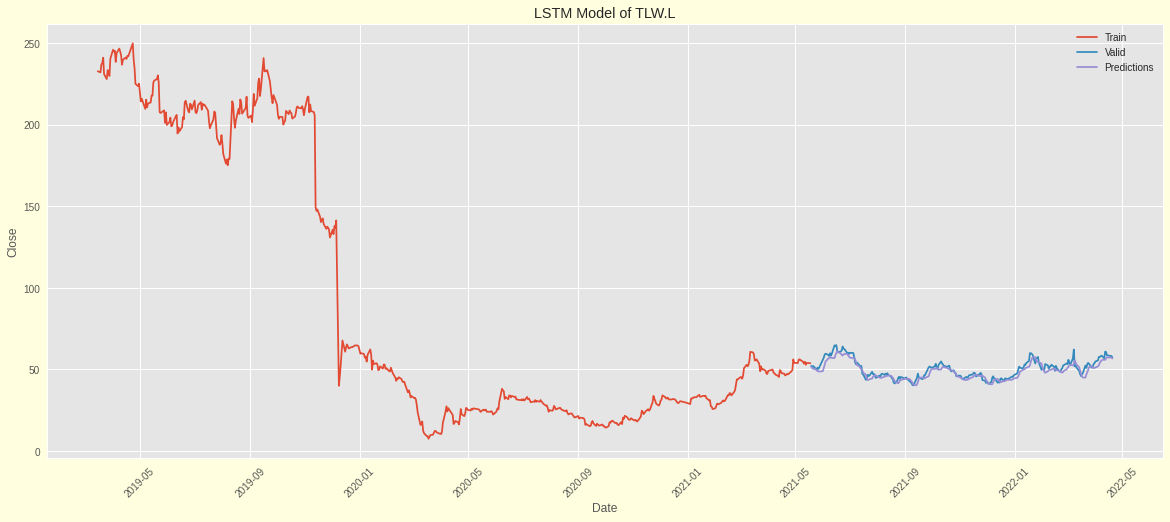

In [ ]:
train = TLWdata[:training_data_len]
valid = TLWdata[training_data_len:]
 
valid['Predictions'] = predict_TLW
fig = plt.figure(figsize = (20, 8), facecolor='lightyellow')
plt.title('LSTM Model of TLW.L')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
 
plt.legend(['Train', 'Valid', 'Predictions'], loc='best')
plt.xticks(rotation=45)
plt.show();


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_TLW))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_TLW))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_TLW)))

Mean Absolute Error: 2.066017330202282
Mean Squared Error: 6.983521836881641
Root Mean Squared Error: 2.642635396130469


In [ ]:

errors = abs(predict_TLW - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy: 96.02 %.


#**END   OF   LSTM**

---



---



ARIMA & Auto ARIMA Model

In [ ]:
import math
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
plt.style.use('seaborn')
plt.style.use('ggplot')

ModuleNotFoundError: ignored

# GOOGLE Dataset

In [ ]:
# getting data from yahoo usin pandas datareader
dfg = pdr.get_data_yahoo('GOOGL', start='2019-01-01')
dfg.head()

In [ ]:
dfg.info()

In [ ]:
dfg['Close'].plot(figsize=(10,5))

In [ ]:
dfg.shape

In [ ]:
train = dfg[0:int(len(dfg)*0.80)]
test = dfg[int(len(dfg)*0.80):]

X_train_log = np.log(train)
X_test_log = np.log(test)

X_train_log = X_train_log[['Close']]
X_test_log = X_test_log[['Close']]

In [ ]:
# rolling mean and standard deviation 
from statsmodels.tsa.stattools import adfuller
def adf_test_stationary(timeseries):
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std
    
    plt.figure(figsize=(12, 5))
    plt.plot(timeseries, color = 'green', label = 'Original')
    plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block = False)
    
    plot_acf(timeseries, color ='blue', label='ACF')
    plot_pacf(timeseries, color='blue', label='PACF')
    plt.show()

#Dickey-Fuller Test  
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag= 'aic')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
adf_test_stationary(train['Close'])




# Auto-ARIMA Model

In [ ]:
model = auto_arima(X_train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(X_train_log)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, index = X_test_log.index, columns = ['Prediction'])
forecast
plt.figure(figsize=(15,5))
plt.plot(X_train_log, label = 'Train')
plt.plot(X_test_log, label = 'Test')
plt.plot(forecast, label = 'Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(X_test_log, forecast))
print('Mean Squared Error:', metrics.mean_squared_error(X_test_log, forecast))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X_test_log, forecast)))

# ARIMA Model

In [ ]:
train = dfg[0:int(len(dfg)*0.7)]
test  = dfg[int(len(dfg)*0.7):]

training = train['Close'].values
test = test['Close'].values
history = [x for x in training]
m_predictions = []
test_observations = len(test)

#p=4,d=1,q=0 
for time_point in range(test_observations):
    model = ARIMA(history, order=(4,1,0))
    m_fit = model.fit(disp=0)
    output = m_fit.forecast()
    y = output[0]
    m_predictions.append(y)
    true_value = test[time_point]
    history.append(true_value) 
    
test_range = dfg[int(len(dfg)*0.7):].index
plt.figure(figsize=(15,5))
plt.plot(test_range, m_predictions, color='green',label='Predicted Price')
plt.plot(test_range, test, color='grey', label='Actual Price')
plt.title('GOOOLE Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.plot(train['Close'])
plt.legend()
plt.show()

In [ ]:
#MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(test, m_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(test, m_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test, m_predictions)))